In [17]:
# import logging
import os
import re
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import torch
import yaml
from einops import rearrange

In [18]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
%autoreload 2

In [20]:
from mushroom.mushroom import Mushroom
import mushroom.utils as utils

In [21]:
run_dir = '/data/estorrs/mushroom/data/projects/subclone'
mushroom_dir = os.path.join(run_dir, 'mushroom')
config_fps = sorted(utils.listfiles(mushroom_dir, regex=r'/config.yaml'))
config_fps

['/data/estorrs/mushroom/data/projects/subclone/mushroom/HT112C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT206B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT225C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT226C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT235B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT243B1-H3/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT243B1-H4/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT268B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT271B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT339B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT413C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclon

In [22]:
mushroom_config = {
    'dtype': 'visium',
#     'sections': config,
    'chkpt_filepath': None,
    'sae_kwargs': {
        'size': 256,
        'patch_size': 32,
        'triplet_scaler': .001,
        'recon_scaler': 1.,
        'encoder_dim': 256,
        'decoder_dim': 256,
    },
    'learner_kwargs': {
        'scale': .1,
        'pct_expression': .02,
        'batch_size': 32,
        'num_workers': 1,
        'device': 'cuda:1',
#         'channels': channels,
#         'channel_mapping': channel_mapping
    },
    'train_kwargs': {
        'num_iters': 10000,
        'lr': 1e-4,
        'log_every': 10,
        'save_every': 1000,
#         'save_dir': chkpt_dir       
    },
    'cluster_kwargs': {
        'num_clusters': 20,
        'mask_background': True,
        'margin': .05,
        'background_channels': None,
        'span_all_sections': True,
        'centroids': None,
    }
}

In [23]:
# config_fp = '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT112C1/config.yaml'
# config_fp = '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT268B1/config.yaml'

config_fp = '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1/config.yaml'
case = config_fp.split('/')[-2]
out_dir = os.path.join(f'/data/estorrs/mushroom/data/projects/subclone/mushroom/{case}_vae_v3/outputs')

# config_fp = '/data/estorrs/mushroom/data/examples/HT397B1_v1/mushroom_outputs/visium_v2'
# out_dir = os.path.join(f'/data/estorrs/mushroom/data/projects/subclone/mushroom/{case}_vq/outputs')


config = yaml.safe_load(open(config_fp))

chkpt_dir = os.path.join(out_dir, 'chkpts')
Path(chkpt_dir).mkdir(parents=True, exist_ok=True)

In [24]:
mushroom_config['sections'] = config
mushroom_config['train_kwargs']['save_dir'] = chkpt_dir
mushroom_config['chkpt_filepath'] = os.path.join(chkpt_dir, '4000iter.pt')

In [25]:
mushroom = Mushroom.from_config(mushroom_config)

INFO:root:using device: cuda:1
INFO:root:generating inputs for visium tissue sections
INFO:root:using 11622 channels
INFO:root:2 sections detected: ['s0', 's3']
INFO:root:processing sections
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:creating data loaders
INFO:root:creating ViT


FileNotFoundError: [Errno 2] No such file or directory: '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1_vae_v3/outputs/chkpts/4000iter.pt'

In [10]:
mushroom.embed_sections()

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

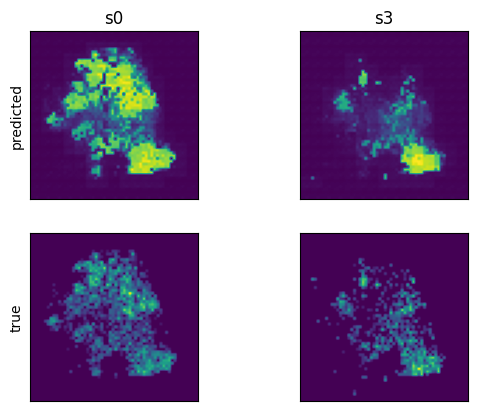

In [11]:
mushroom.display_predicted_pixels(channel='EPCAM')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

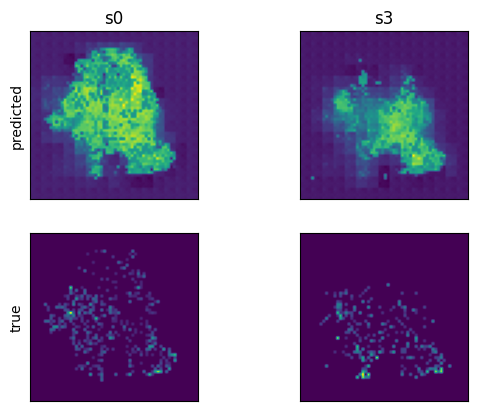

In [12]:
mushroom.display_predicted_pixels(channel='IL7R')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

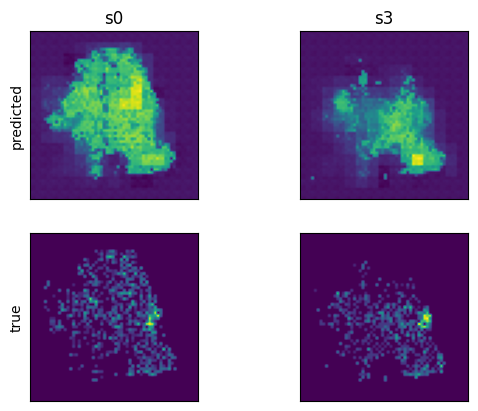

In [13]:
mushroom.display_predicted_pixels(channel='CD68')

In [14]:
mushroom.cluster_sections(margin=.1)

INFO:root:no background channel detected, defaulting to mean of all channels
/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 13] Permission denied: 'lscpu'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/joblib/externals/loky/backend/context.py", line 250, in _count_physical_cores
    cpu_info = subprocess.run(
  File "/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/data/estorrs/miniconda3/en

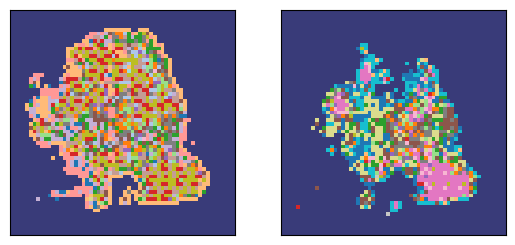

In [15]:
mushroom.clusterer.display_cluster_ids(mushroom.cluster_ids)

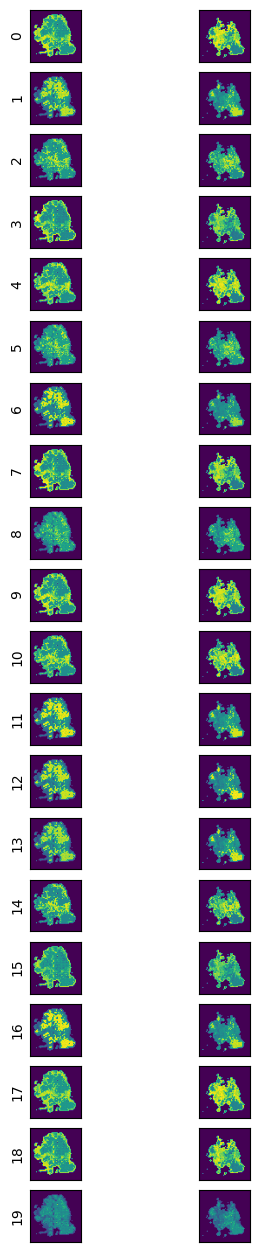

In [16]:
mushroom.clusterer.display_distances(mushroom.dists, figsize=(4, 16))

In [214]:
dists = torch.cdist(rearrange(mushroom.recon_embs_prequant, 'n d h w -> n h w d'),
                    mushroom.learner.sae.vq.codebook.clone().cpu()).detach().cpu()
dists.shape

torch.Size([2, 60, 60, 100])

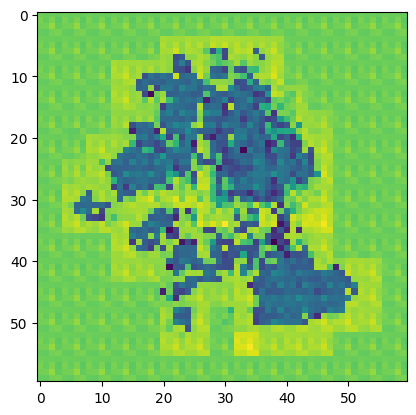

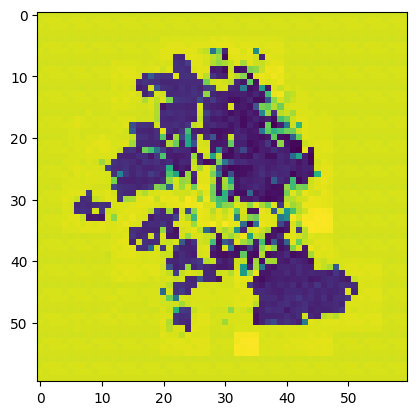

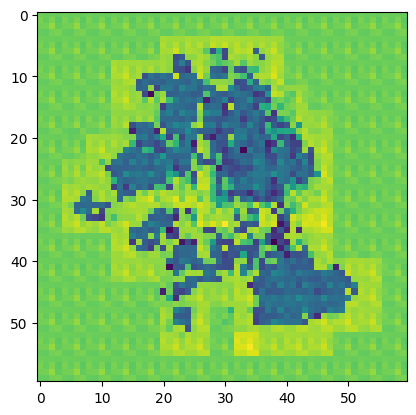

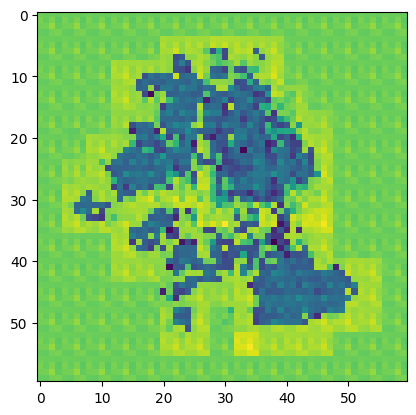

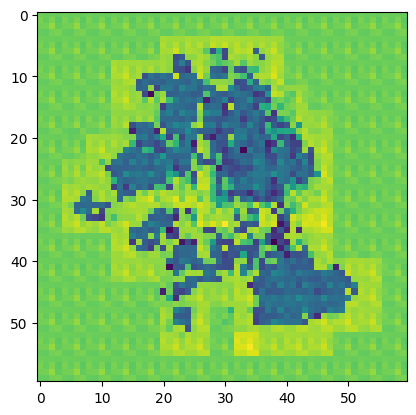

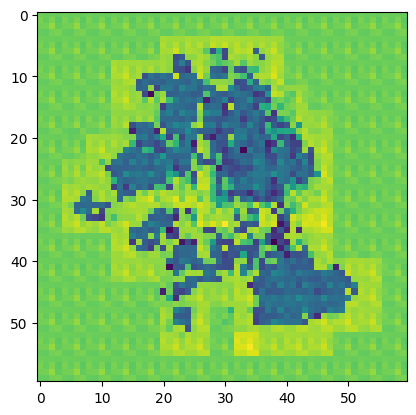

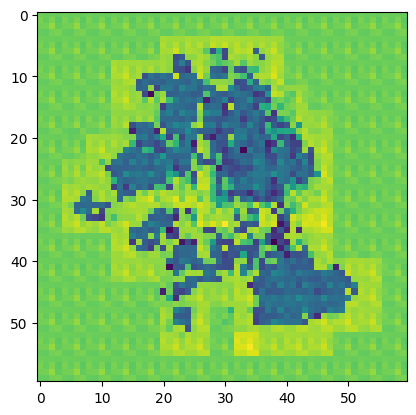

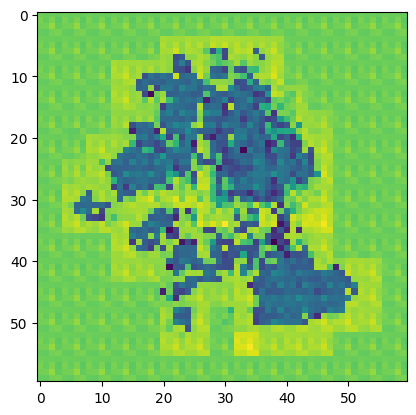

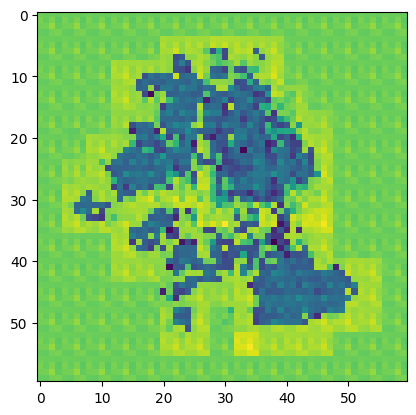

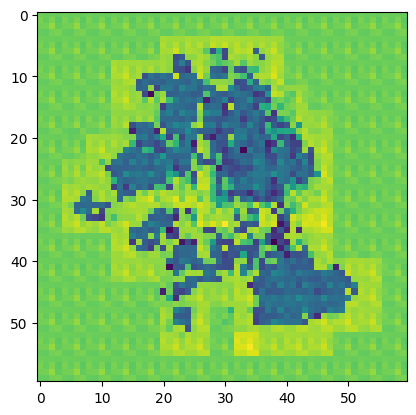

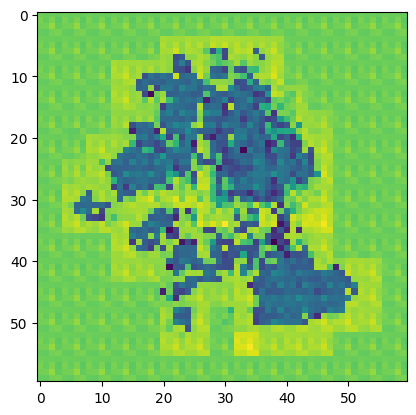

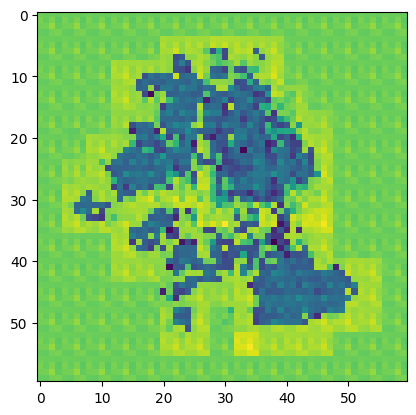

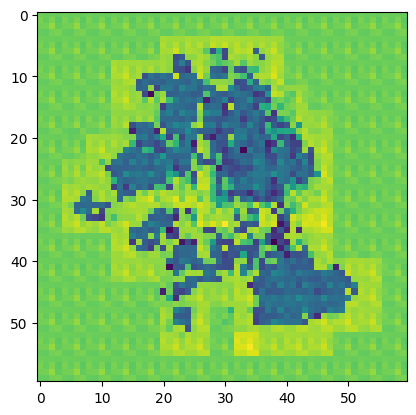

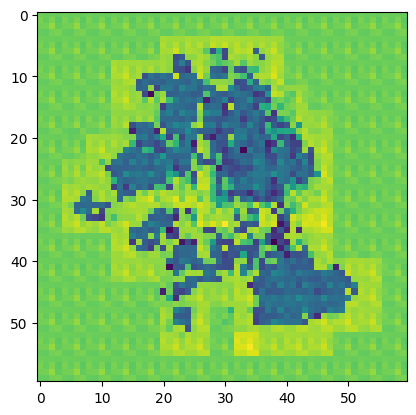

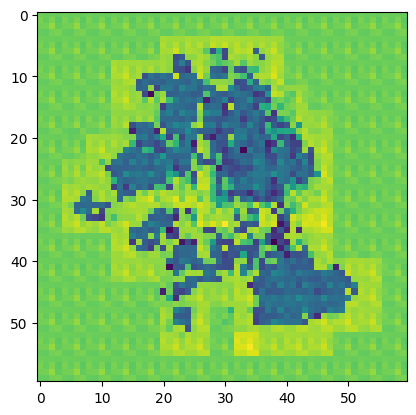

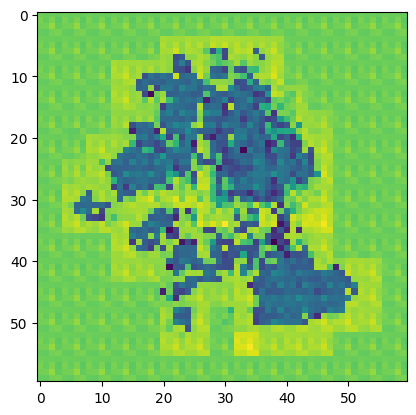

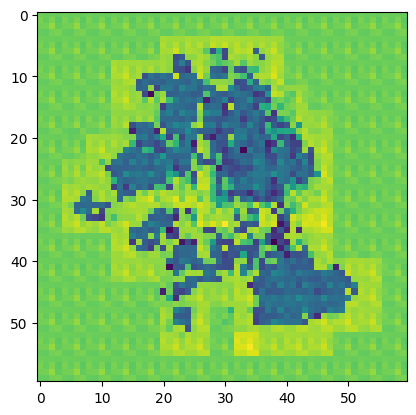

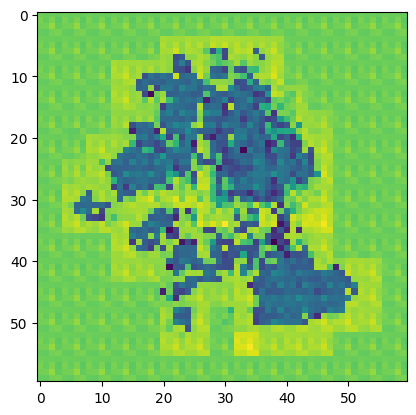

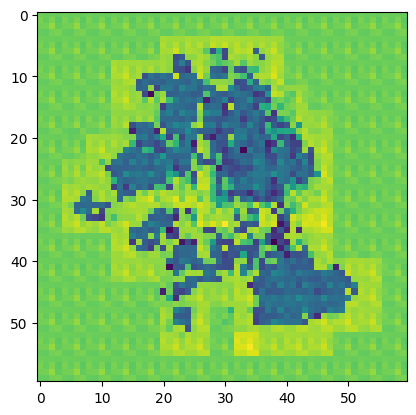

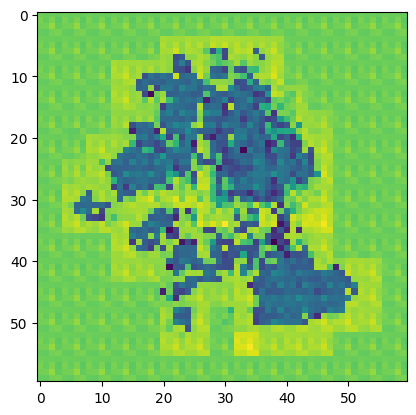

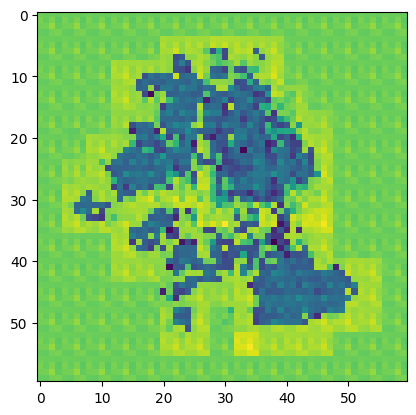

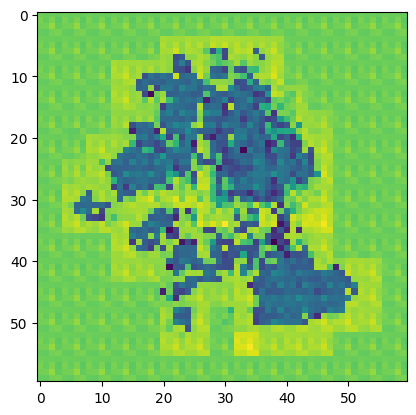

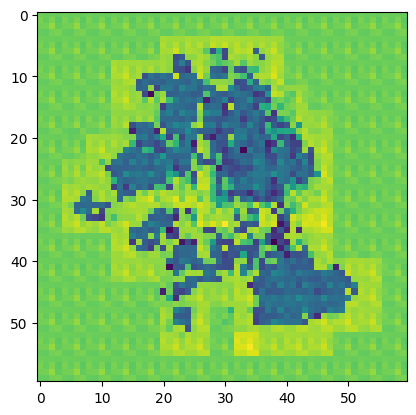

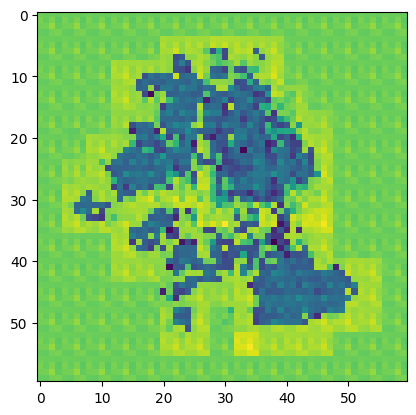

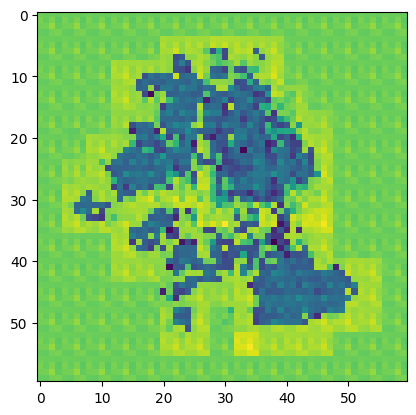

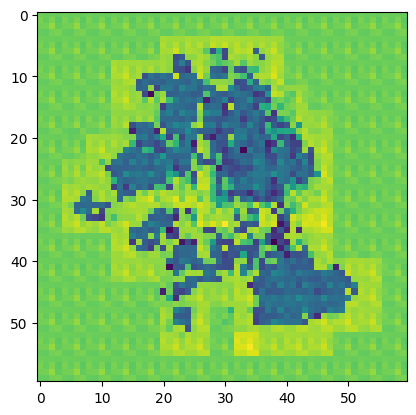

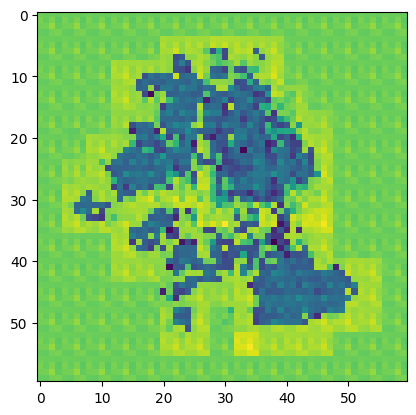

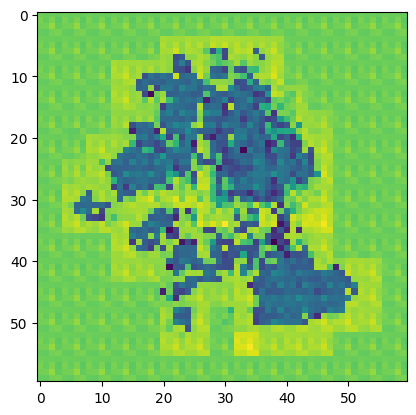

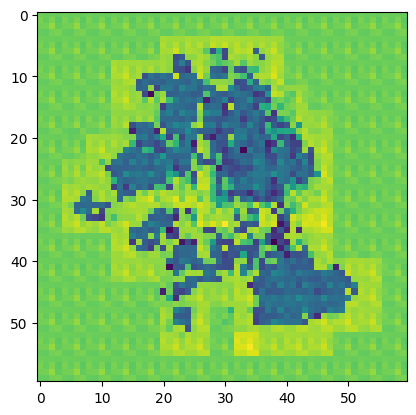

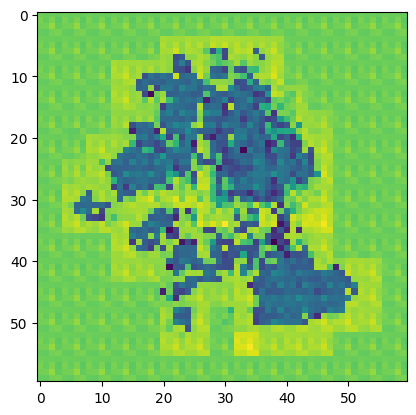

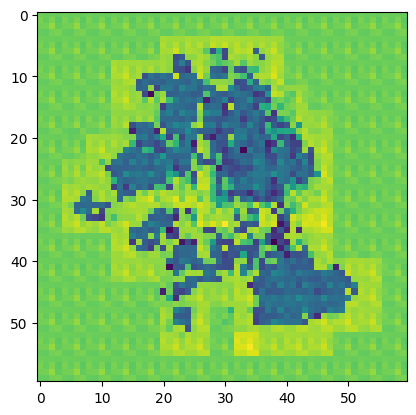

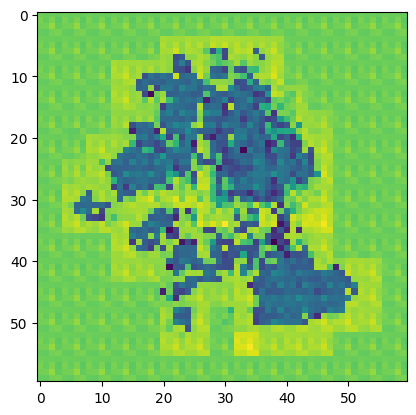

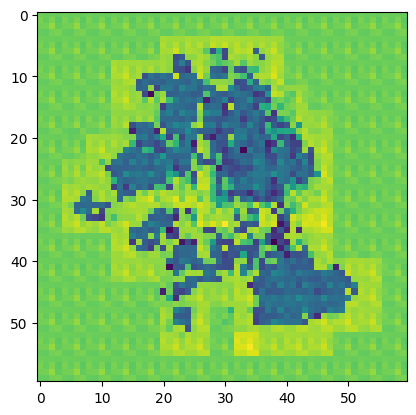

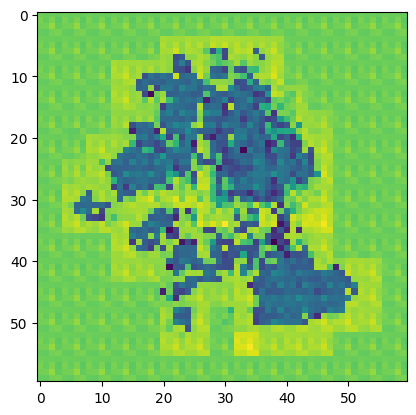

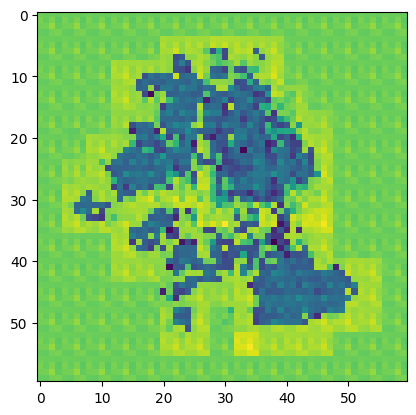

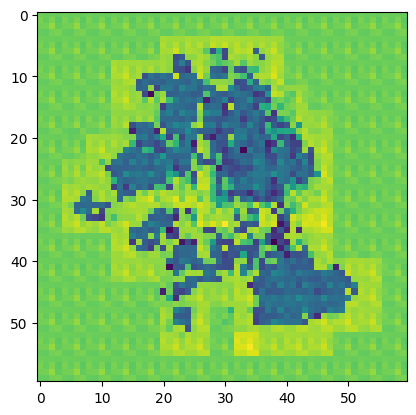

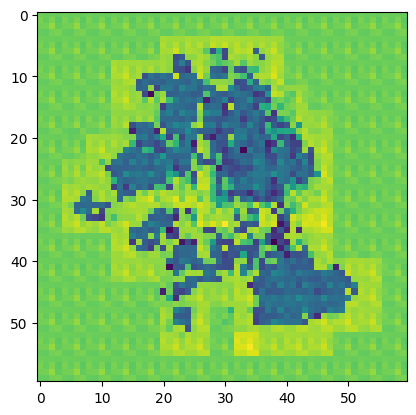

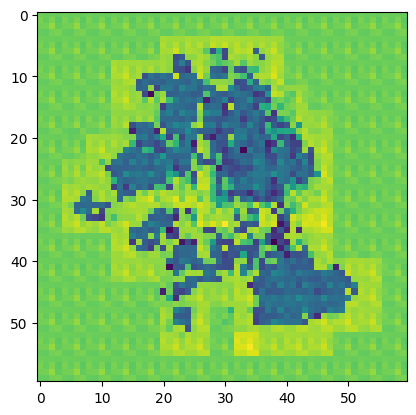

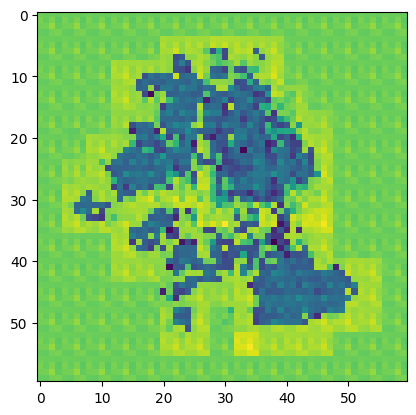

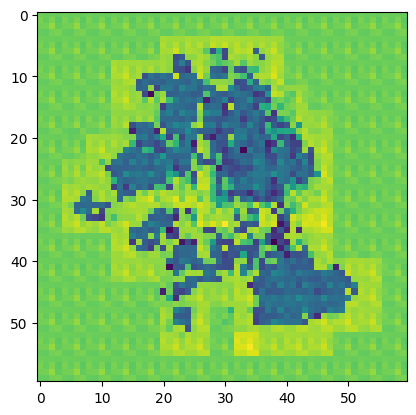

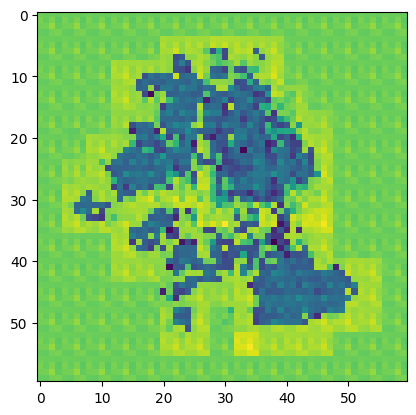

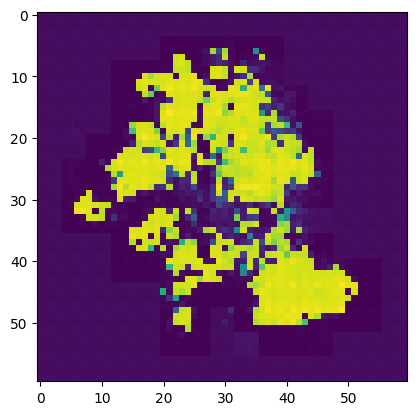

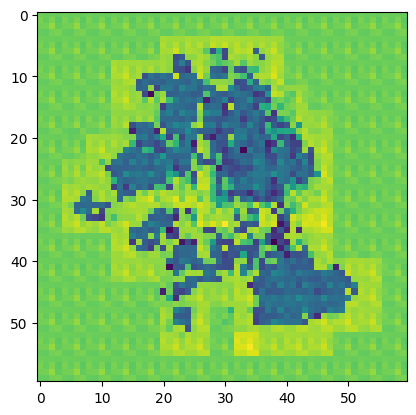

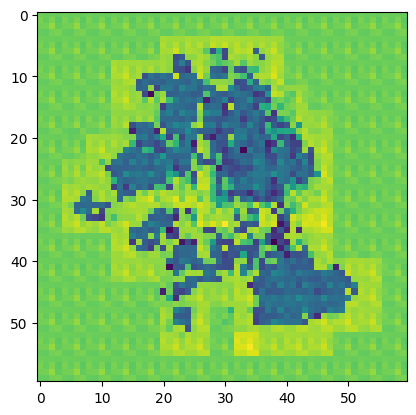

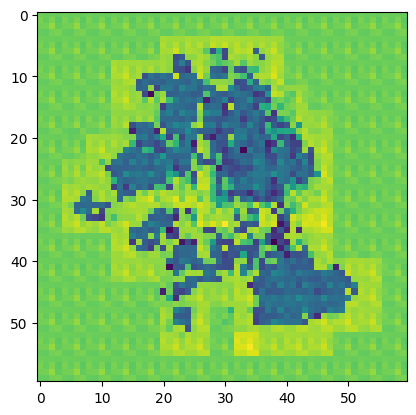

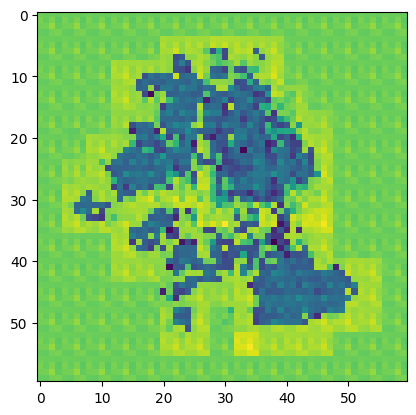

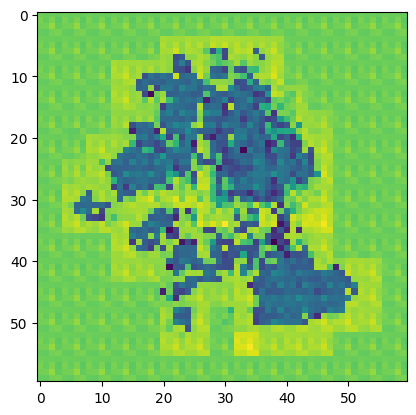

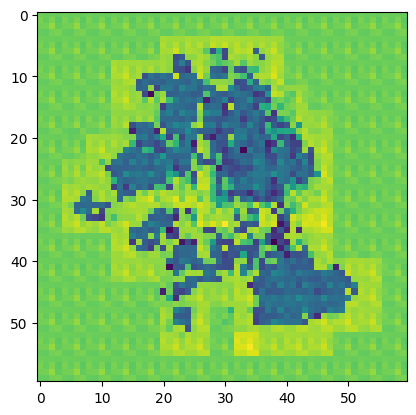

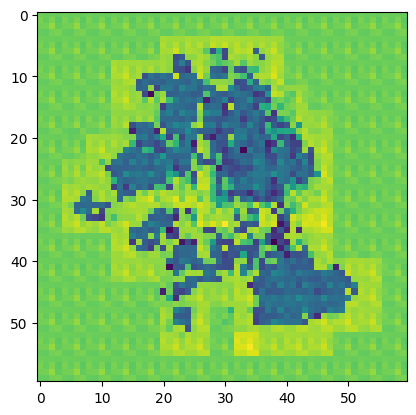

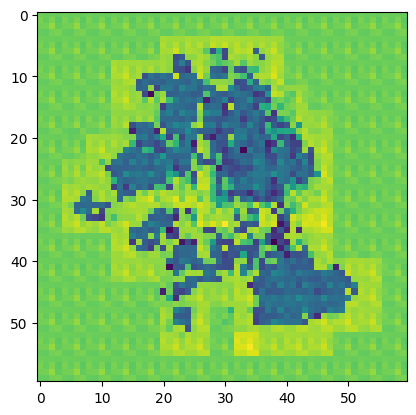

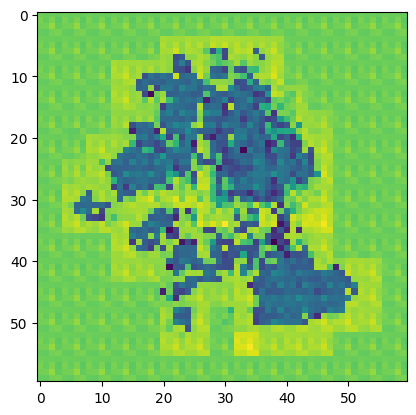

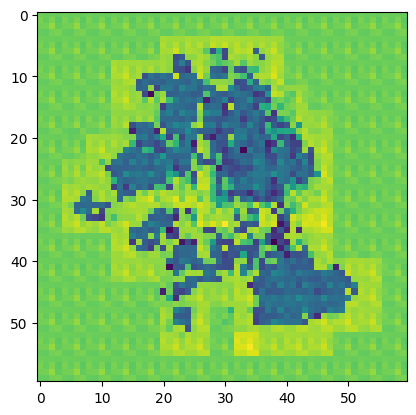

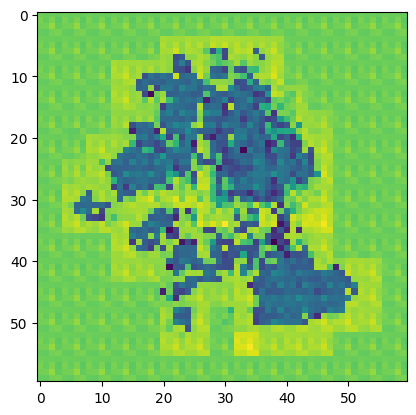

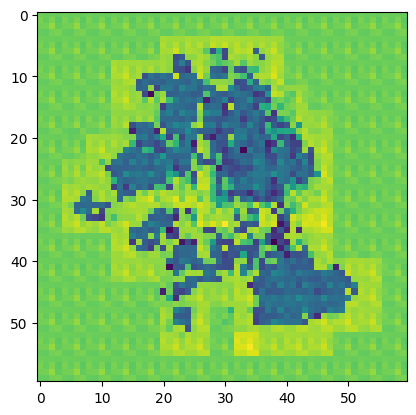

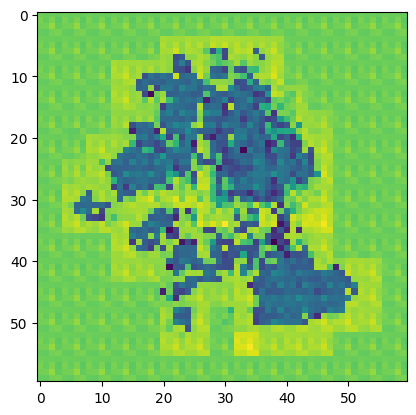

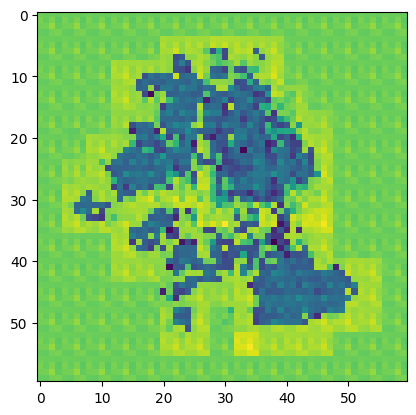

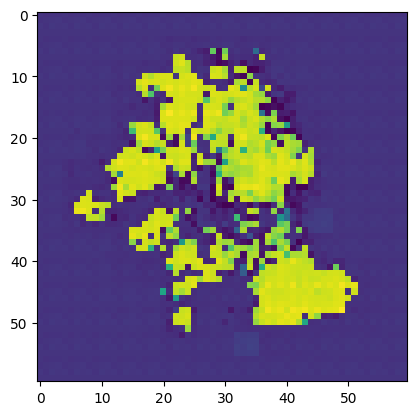

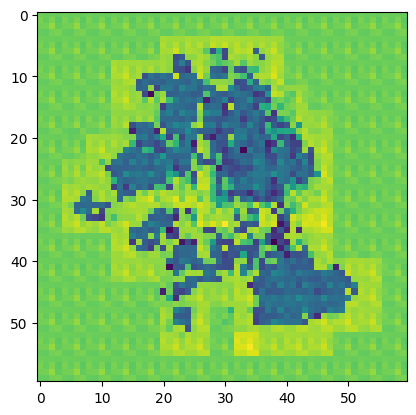

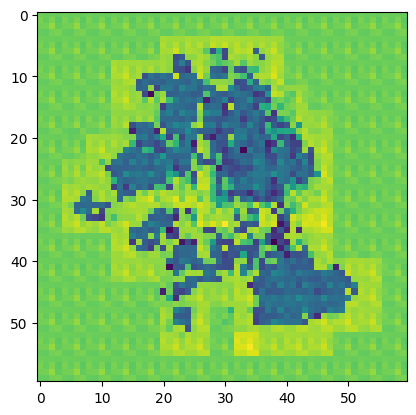

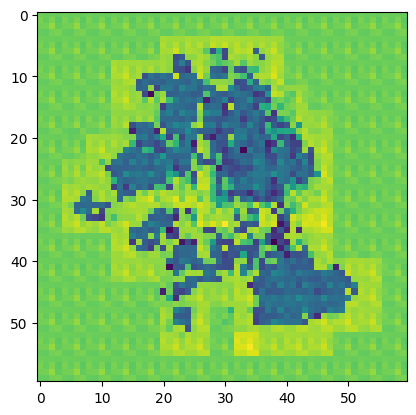

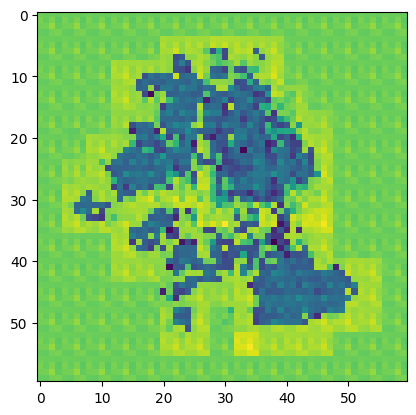

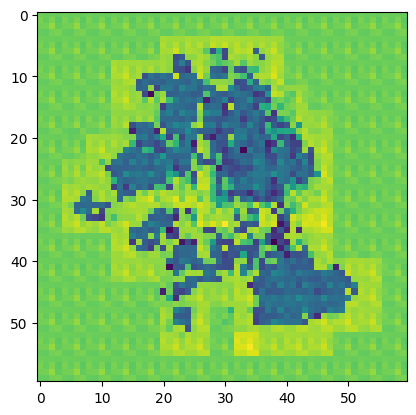

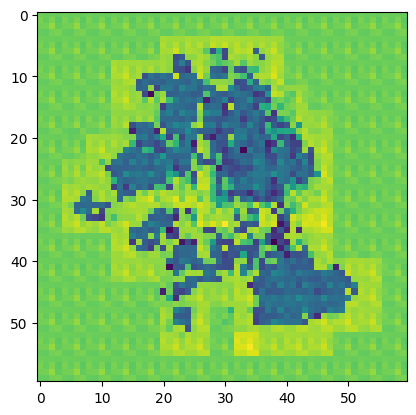

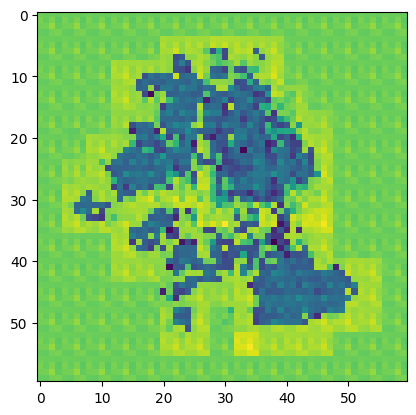

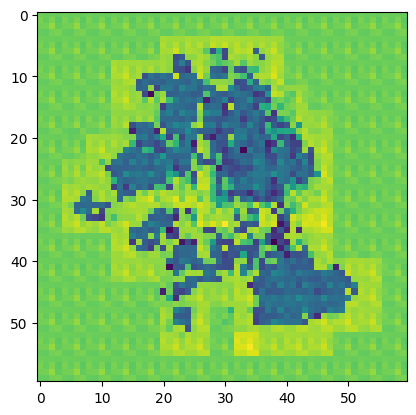

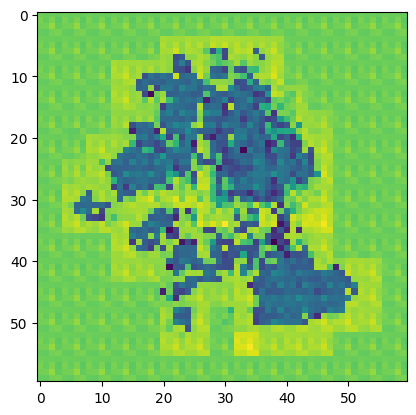

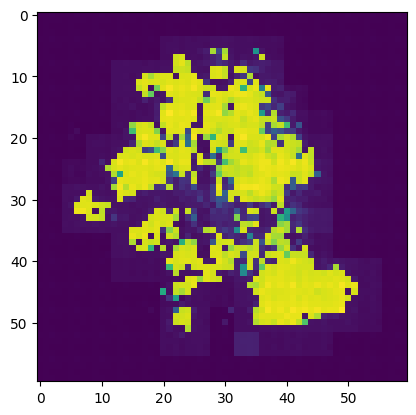

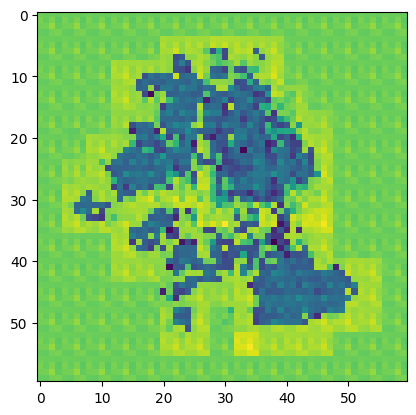

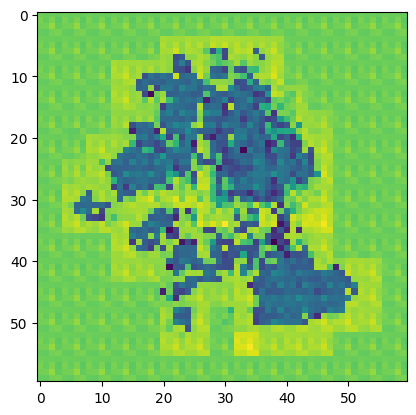

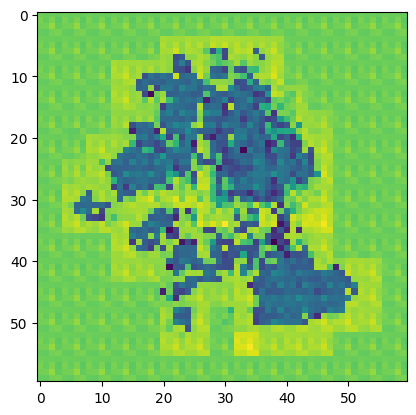

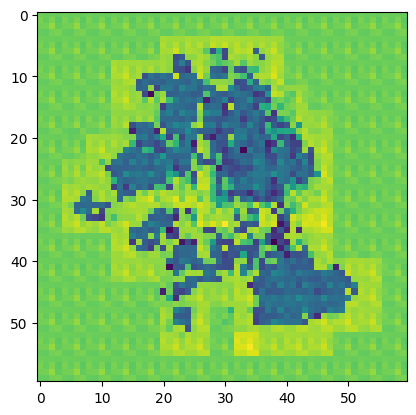

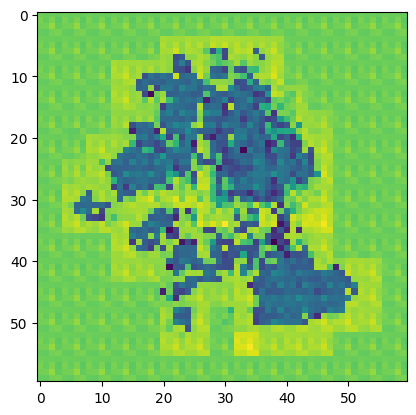

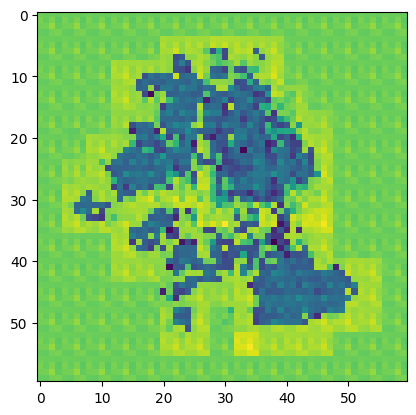

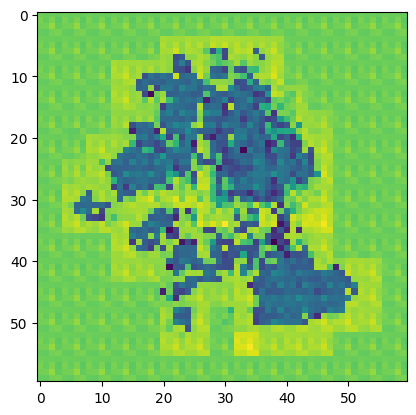

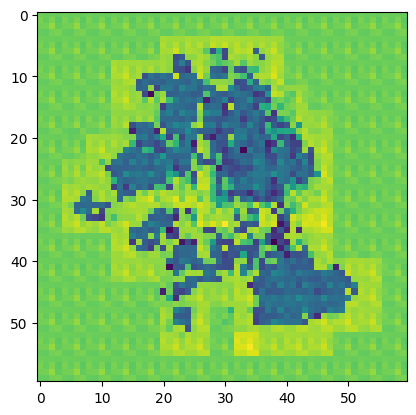

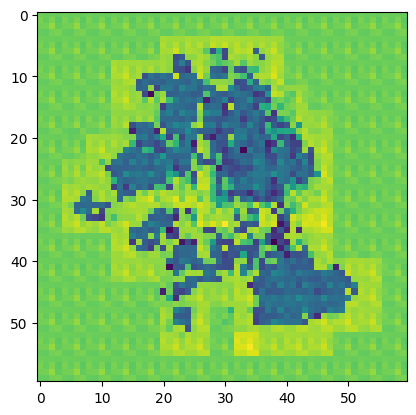

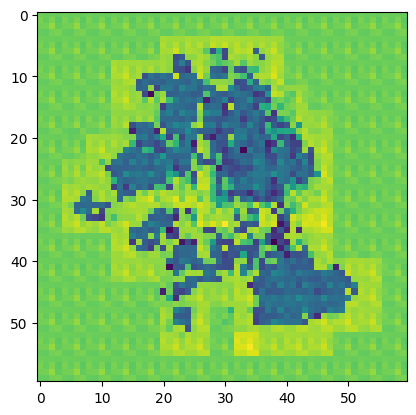

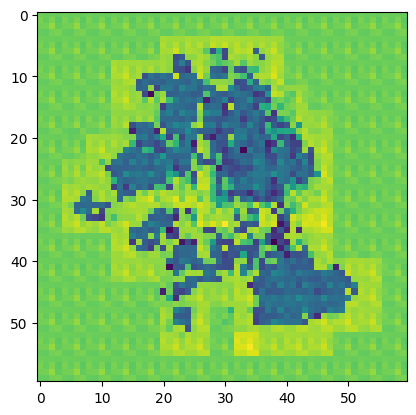

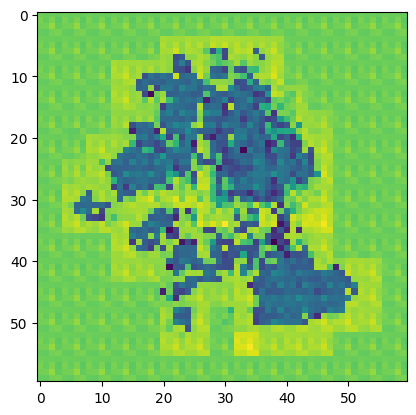

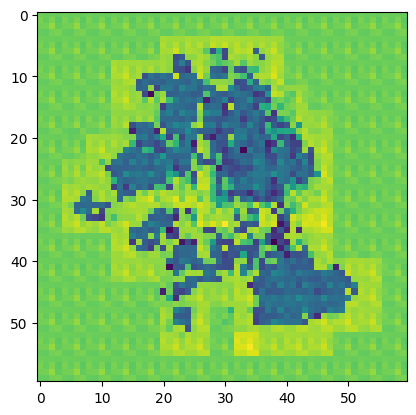

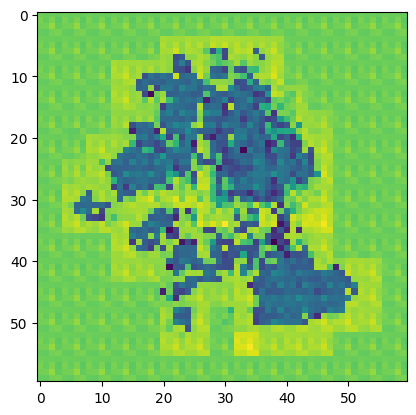

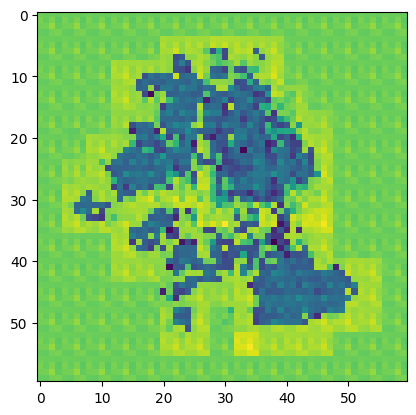

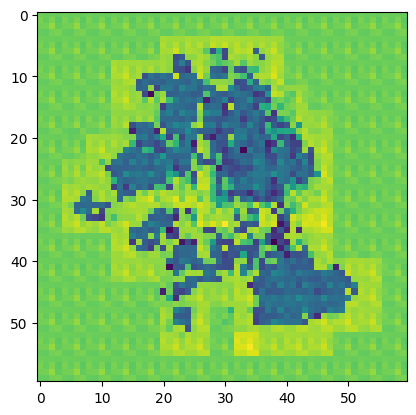

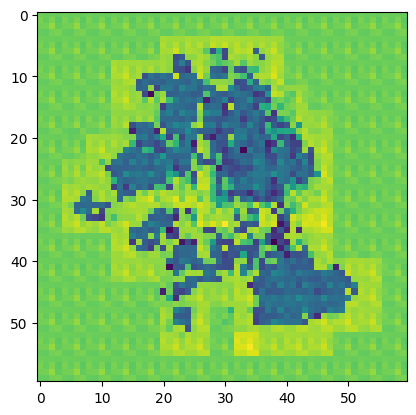

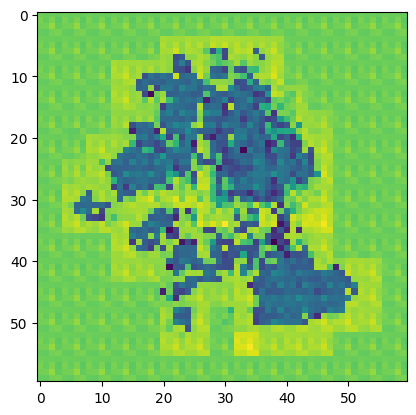

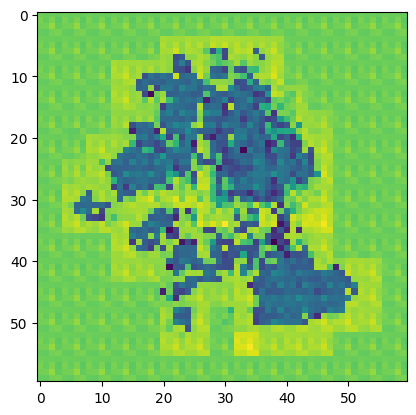

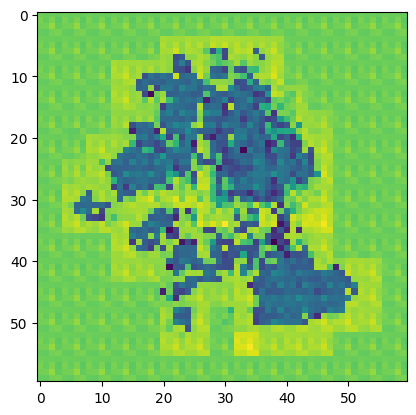

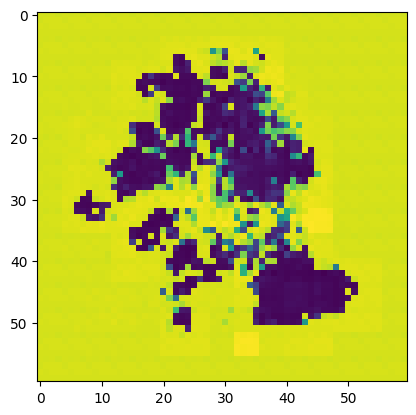

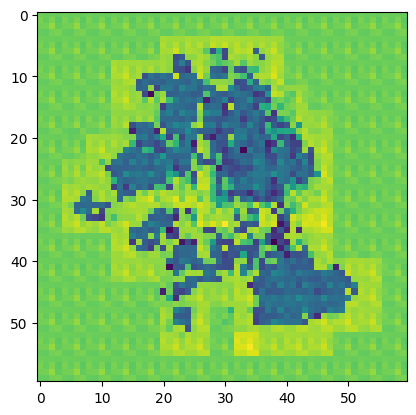

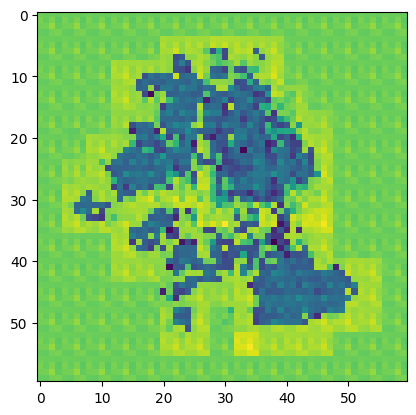

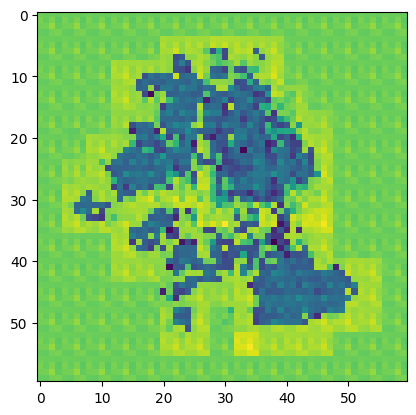

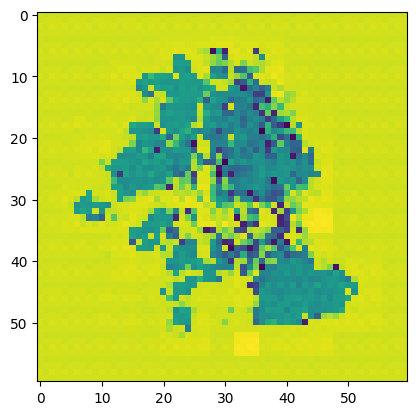

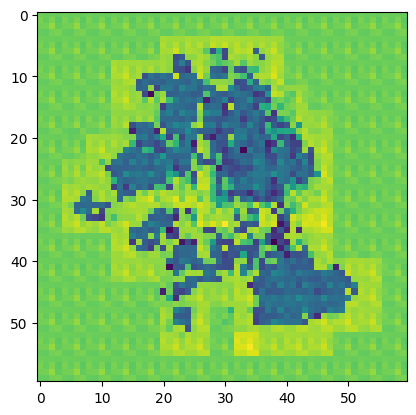

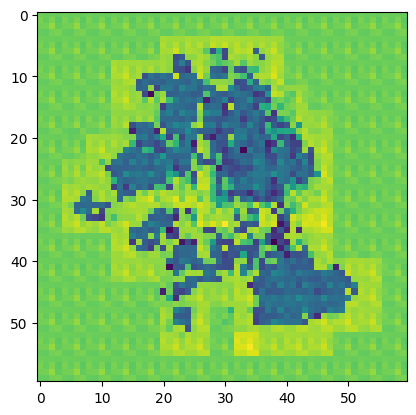

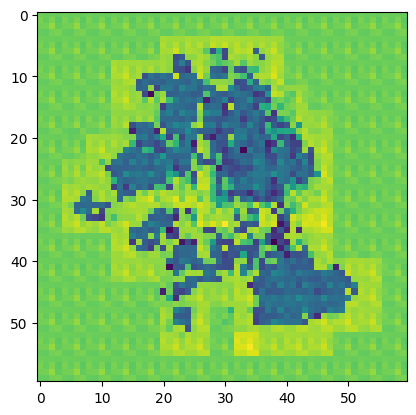

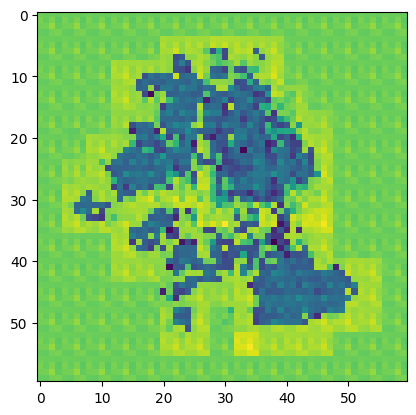

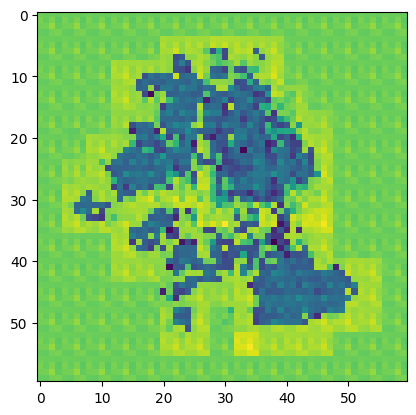

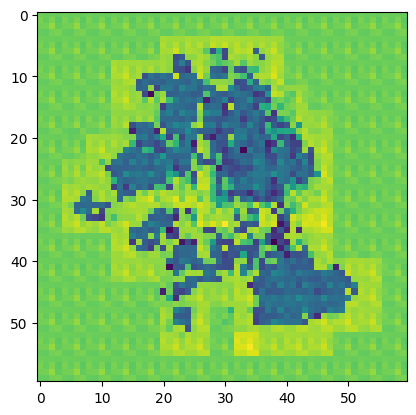

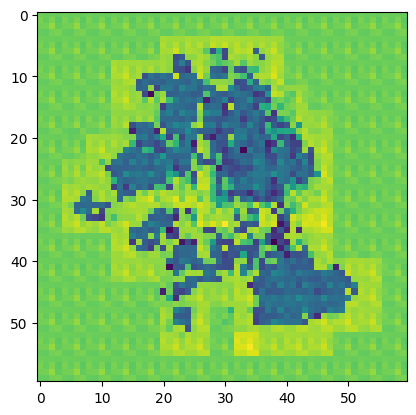

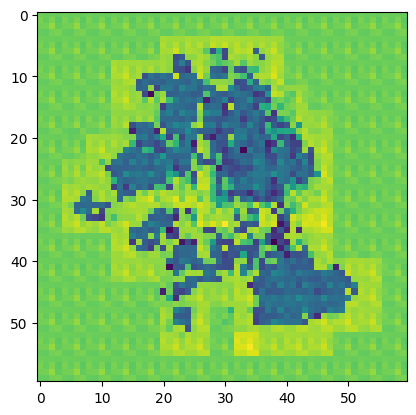

In [215]:
for i in range(dists.shape[-1]):
    img = dists[0, :, :, i]
    plt.imshow(img)
    plt.show()

## calculate codebook distances

In [115]:
case_mapping = {}

In [35]:
mushroom_config = {
    'dtype': 'visium',
#     'sections': config,
    'chkpt_filepath': None,
    'sae_kwargs': {
        'size': 256,
        'patch_size': 32,
        'triplet_scaler': .1,
        'recon_scaler': 1.,
    },
    'learner_kwargs': {
        'scale': .1,
        'pct_expression': .02,
        'batch_size': 32,
        'num_workers': 1,
        'device': 'cuda:3'
#         'channels': channels,
#         'channel_mapping': channel_mapping
    },
    'train_kwargs': {
        'num_iters': 2000,
        'lr': 1e-4,
        'log_every': 10,
        'save_every': 500,
#         'save_dir': chkpt_dir       
    },
    'cluster_kwargs': {
        'num_clusters': 20,
        'mask_background': True,
        'margin': .05,
        'background_channels': None,
        'span_all_sections': True,
        'centroids': None,
    }
}

In [42]:
# config_fp = '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT268B1/config.yaml'
# config_fp = '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1/config.yaml'
config_fp = '/data/estorrs/mushroom/data/examples/HT397B1_v1/registration/registered/mushroom_inputs.yaml'

config = yaml.safe_load(open(config_fp))
case = config_fp.split('/')[-2]

out_dir = '/data/estorrs/mushroom/data/examples/HT397B1_v1/mushroom_outputs/visium_v2'
chkpt_filepath = os.path.join(out_dir, 'chkpts', '600iter.pt')

# out_dir = os.path.join(f'/data/estorrs/mushroom/data/projects/subclone/mushroom/{case}_novq/outputs')
# chkpt_filepath = f'/data/estorrs/mushroom/data/projects/subclone/mushroom/{case}_novq/outputs/chkpts/400iter.pt'

In [43]:
mushroom_config['sections'] = config
# mushroom_config['train_kwargs']['save_dir'] = chkpt_dir
mushroom_config['chkpt_filepath'] = chkpt_filepath

In [44]:
mushroom = Mushroom.from_config(mushroom_config)

INFO:root:using device: cuda:3
INFO:root:generating inputs for visium tissue sections
INFO:root:using 11608 channels
INFO:root:2 sections detected: ['s0', 's3']
INFO:root:processing sections
/data/estorrs/mushroom/mushroom/data/visium.py:54: RuntimeWarning: invalid value encountered in divide
  adata.X = adata.X / adata.X.max(0)
/data/estorrs/mushroom/mushroom/data/visium.py:54: RuntimeWarning: invalid value encountered in divide
  adata.X = adata.X / adata.X.max(0)
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:learner initialized
INFO:root:initializing clusterer
INFO:root:no background channel detected, defaulting to mean of all channels


In [45]:
mushroom.embed_sections()

In [30]:
# dists = torch.cdist(rearrange(mushroom.recon_embs_prequant, 'n d h w -> n h w d'),
#                     mushroom.learner.sae.vq.codebook.clone().cpu())
# dists.shape

In [16]:
torch.save(dists, os.path.join(out_dir, 'distances.pt'))

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

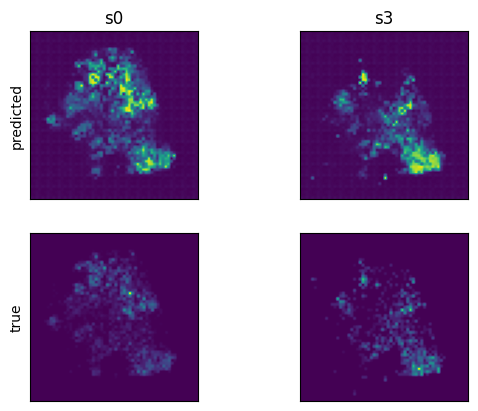

In [46]:
mushroom.display_predicted_pixels(channel='EPCAM')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

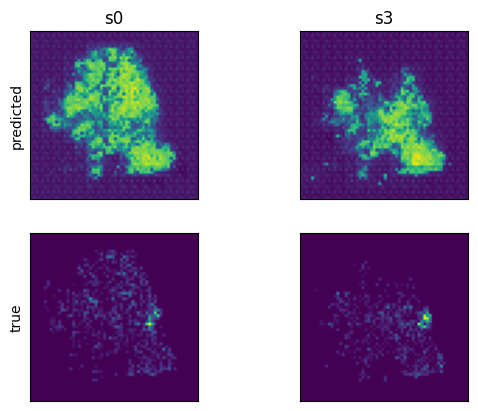

In [47]:
mushroom.display_predicted_pixels(channel='CD68')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

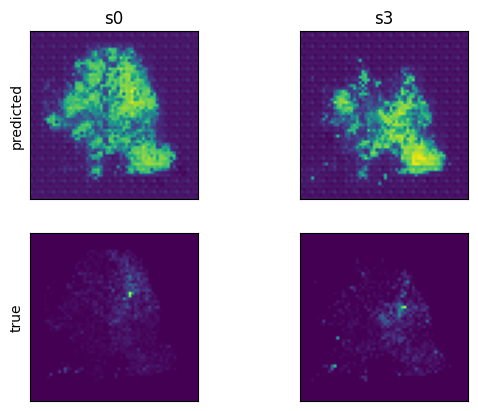

In [48]:
mushroom.display_predicted_pixels(channel='ACTA2')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

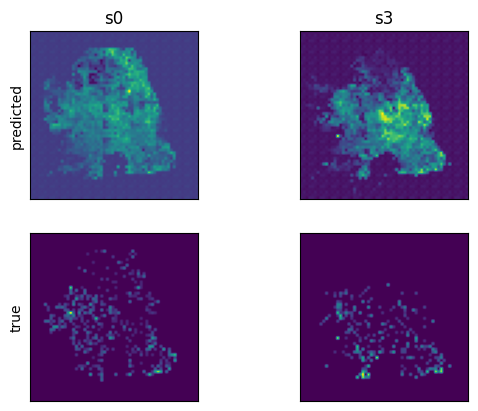

In [153]:
mushroom.display_predicted_pixels(channel='IL7R')

In [142]:
mushroom.cluster_sections(margin=.1)

INFO:root:no background channel detected, defaulting to mean of all channels


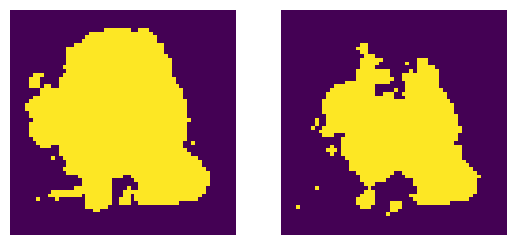

In [143]:
mushroom.clusterer.display_section_masks()

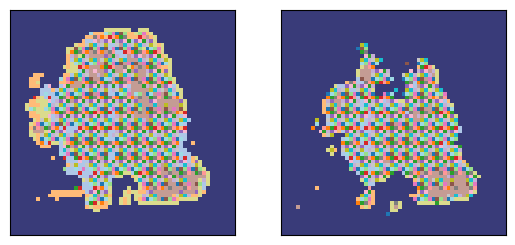

In [144]:
mushroom.clusterer.display_cluster_ids(mushroom.cluster_ids)

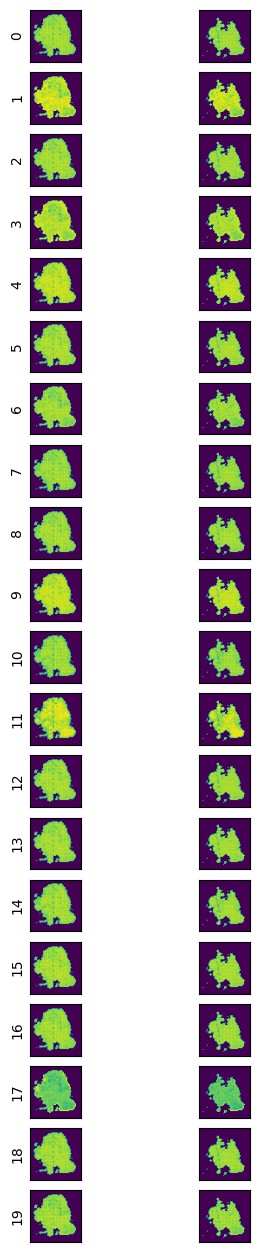

In [145]:
mushroom.clusterer.display_distances(mushroom.dists, figsize=(4, 16))

## integrate rctd

In [6]:
# df = pd.read_csv(
#     '/diskmnt/Datasets/Spatial_Transcriptomics/Analysis/ST_subclone/13-RCTD/13_3-cohort/Sample_ref/RCTD_all_celltype_cohort_2023-09-19.tsv',
    
# )

rctd_df = pd.read_csv(
    '/data/estorrs/sandbox/RCTD_all_celltype_cohort_2023-09-19.tsv',
    sep='\t'
    
)
rctd_df = rctd_df[[c for c in rctd_df.columns if 'RCTD' == c[:4] or c in ['sample_id', 'barcode']]]
rctd_df

sample_id             barcode  RCTD_Tumor  RCTD_B  \
0           HT112C1-U1_ST_Bn1  AAACAAGTATCTCCCA-1    0.949060     0.0   
1           HT112C1-U1_ST_Bn1  AAACACCAATAACTGC-1    0.969906     0.0   
2           HT112C1-U1_ST_Bn1  AAACATTTCCCGGATT-1    0.751848     0.0   
3           HT112C1-U1_ST_Bn1  AAACCCGAACGAAATC-1    0.000000     0.0   
4           HT112C1-U1_ST_Bn1  AAACCGGGTAGGTACC-1    0.922255     0.0   
...                       ...                 ...         ...     ...   
120123  HT472C1-Th1K1Fp1U1Bp1  TTGTTAGCAAATTCGA-1    0.000000     0.0   
120124  HT472C1-Th1K1Fp1U1Bp1  TTGTTCAGTGTGCTAC-1    0.000000     0.0   
120125  HT472C1-Th1K1Fp1U1Bp1  TTGTTGTGTGTCAAGA-1    1.000000     0.0   
120126  HT472C1-Th1K1Fp1U1Bp1  TTGTTTCATTAGTCTA-1    1.000000     0.0   
120127  HT472C1-Th1K1Fp1U1Bp1  TTGTTTCCATACAACT-1    0.000000     0.0   

        RCTD_Endothelial  RCTD_Fibroblast  RCTD_Hepatocyte  RCTD_Macrophage  \
0                    0.0         0.000000         0.000000         0.050940   
1                    0.0         0.030094         0.000000         0.000000   
2                    0.0         0.113756         0.000000         0.134396   
3                    0.0         0.230694         0.127608         0.326089   
4                    0.0         0.020764         0.000000         0.056981   
...                  ...              ...              ...              ...   
120123               0.0         0.000000         0.000000         1.000000   
120124               0.0         0.000000         0.000000         0.000000   
120125               0.0         0.000000         0.000000         0.000000   
120126               0.0         0.000000         0.000000         0.000000   
120127               0.0         0.000000         0.000000         0.000000   

        RCTD_NK  RCTD_Plasma  ...  RCTD_Pericyte  RCTD_Cholangiocyte  \
0           0.0          0.0  ...            NaN                 NaN   
1           0.0          0.0  ...            NaN                 NaN   
2           0.0          0.0  ...            NaN                 NaN   
3           0.0          0.0  ...            NaN                 NaN   
4           0.0          0.0  ...            NaN                 NaN   
...         ...          ...  ...            ...                 ...   
120123      NaN          NaN  ...            NaN                 0.0   
120124      NaN          NaN  ...            NaN                 0.0   
120125      NaN          NaN  ...            NaN                 0.0   
120126      NaN          NaN  ...            NaN                 0.0   
120127      NaN          NaN  ...            NaN                 0.0   

        RCTD_cDC2  RCTD_Ductal  RCTD_Islet_alpha  RCTD_Islet_beta  \
0             NaN          NaN               NaN              NaN   
1             NaN          NaN               NaN              NaN   
2             NaN          NaN               NaN              NaN   
3             NaN          NaN               NaN              NaN   
4             NaN          NaN               NaN              NaN   
...           ...          ...               ...              ...   
120123        NaN          NaN               NaN              NaN   
120124        NaN          NaN               NaN              NaN   
120125        NaN          NaN               NaN              NaN   
120126        NaN          NaN               NaN              NaN   
120127        NaN          NaN               NaN              NaN   

        RCTD_Islet_gamma  RCTD_Acinar  RCTD_Islet  RCTD_Lymphatic  
0                    NaN          NaN         NaN             NaN  
1                    NaN          NaN         NaN             NaN  
2                    NaN          NaN         NaN             NaN  
3                    NaN          NaN         NaN             NaN  
4                    NaN          NaN         NaN             NaN  
...                  ...          ...         ...             ...  
120123               NaN

In [7]:
sorted(set(rctd_df['sample_id']))

['HT112C1-U1_ST_Bn1',
 'HT112C1-U2_ST_Bn1',
 'HT206B1-S1Fc1U2Z1B1',
 'HT206B1-S1Fc1U3Z1B1',
 'HT206B1-S1Fc1U4Z1B1',
 'HT206B1-S1Fc1U5Z1B1',
 'HT206B1-U1_ST_Bn1',
 'HT253C1-Th1K1Fc2U1Z1Bs1',
 'HT260C1-Th1K1Fc2U1Z1Bs1',
 'HT265B1-S1H1Fc2U1Z1Bs1',
 'HT268B1-Th1H3Fc2U12Z1Bs1',
 'HT268B1-Th1H3Fc2U22Z1Bs1',
 'HT268B1-Th1H3Fc2U2Z1Bs1',
 'HT268B1-Th1H3Fc2U32Z1Bs1',
 'HT268B1-Th1K3Fc2U1Z1Bs1',
 'HT270P1-H2Fc2U1Z1Bs1',
 'HT270P1-S1H1Fs5U1Bp1',
 'HT288P1-S1H4Fc2U1Z1Bs1',
 'HT306P1-S1H1Fc2U1Z1Bs1',
 'HT308B1-S1H1Fc2U1Z1Bs1',
 'HT308B1-S1H4Fc2U1Z1Bs1',
 'HT308B1-S1H5Fc2U1Z1Bs1',
 'HT308B1-S2H5Fc2U1Z1Bs1',
 'HT339B1-S1H3Fc2U1Z1Bs1',
 'HT339B1-S1H3Fc2U2Bs2',
 'HT339B2-H1Fp1U1Bp1',
 'HT397B1-S1H2Fs4U1Bp1',
 'HT397B1-S1H3A1U1Bp1',
 'HT397B1-S1H3A1U21Bp1',
 'HT397B1-S1H3Fs1U1Bp1',
 'HT472C1-S1H4Fp1U1Bp1',
 'HT472C1-Th1K1Fp1U1Bp1']

In [8]:
mapping = {
    'HT206B1-U2': 'HT206B1-S1Fc1U2Z1B1',
    'HT206B1-U3': 'HT206B1-S1Fc1U3Z1B1',
    'HT206B1-U4': 'HT206B1-S1Fc1U4Z1B1',
    'HT206B1-U5': 'HT206B1-S1Fc1U5Z1B1',
    'HT268B1-U1': 'HT268B1-Th1K3Fc2U1Z1Bs1',
    'HT268B1-U2': 'HT268B1-Th1H3Fc2U2Z1Bs1',
    'HT268B1-U12': 'HT268B1-Th1H3Fc2U12Z1Bs1',
    'HT268B1-U22': 'HT268B1-Th1H3Fc2U22Z1Bs1',
    'HT268B1-U32': 'HT268B1-Th1H3Fc2U32Z1Bs1',
    'HT397B1-U1': 'HT397B1-S1H3A1U1Bp1',
    'HT397B1-U21': 'HT397B1-S1H3A1U21Bp1',
}
r_mapping = {v:k for k, v in mapping.items()}

In [9]:
for x in sorted(set(rctd_df['sample_id'])):
    if x in r_mapping:
        print(x)

HT206B1-S1Fc1U2Z1B1
HT206B1-S1Fc1U3Z1B1
HT206B1-S1Fc1U4Z1B1
HT206B1-S1Fc1U5Z1B1
HT268B1-Th1H3Fc2U12Z1Bs1
HT268B1-Th1H3Fc2U22Z1Bs1
HT268B1-Th1H3Fc2U2Z1Bs1
HT268B1-Th1H3Fc2U32Z1Bs1
HT268B1-Th1K3Fc2U1Z1Bs1
HT397B1-S1H3A1U1Bp1
HT397B1-S1H3A1U21Bp1


In [10]:
rctd_df['spot_id'] = [f'{r_mapping[sample]}_{barcode}' if sample in r_mapping else None
                 for sample, barcode in zip(rctd_df['sample_id'], rctd_df['barcode'])]
rctd_df = rctd_df[~pd.isnull(rctd_df['spot_id'])]
rctd_df = rctd_df.set_index('spot_id')
rctd_df

sample_id             barcode  \
spot_id                                                                    
HT206B1-U2_AAACAACGAATAGTTC-1    HT206B1-S1Fc1U2Z1B1  AAACAACGAATAGTTC-1   
HT206B1-U2_AAACAAGTATCTCCCA-1    HT206B1-S1Fc1U2Z1B1  AAACAAGTATCTCCCA-1   
HT206B1-U2_AAACAATCTACTAGCA-1    HT206B1-S1Fc1U2Z1B1  AAACAATCTACTAGCA-1   
HT206B1-U2_AAACACCAATAACTGC-1    HT206B1-S1Fc1U2Z1B1  AAACACCAATAACTGC-1   
HT206B1-U2_AAACAGAGCGACTCCT-1    HT206B1-S1Fc1U2Z1B1  AAACAGAGCGACTCCT-1   
...                                              ...                 ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1  HT397B1-S1H3A1U21Bp1  TTGTTCAGTGTGCTAC-1   
HT397B1-U21_TTGTTGTGTGTCAAGA-1  HT397B1-S1H3A1U21Bp1  TTGTTGTGTGTCAAGA-1   
HT397B1-U21_TTGTTTCACATCCAGG-1  HT397B1-S1H3A1U21Bp1  TTGTTTCACATCCAGG-1   
HT397B1-U21_TTGTTTCATTAGTCTA-1  HT397B1-S1H3A1U21Bp1  TTGTTTCATTAGTCTA-1   
HT397B1-U21_TTGTTTGTATTACACG-1  HT397B1-S1H3A1U21Bp1  TTGTTTGTATTACACG-1   

                                RCTD_Tumor  RCTD_B  RCTD_Endothelial  \
spot_id                                                                
HT206B1-U2_AAACAACGAATAGTTC-1     0.867253     0.0          0.132747   
HT206B1-U2_AAACAAGTATCTCCCA-1     0.891083     0.0          0.108917   
HT206B1-U2_AAACAATCTACTAGCA-1     0.666476     0.0          0.000000   
HT206B1-U2_AAACACCAATAACTGC-1     0.618238     0.0          0.000000   
HT206B1-U2_AAACAGAGCGACTCCT-1     0.619450     0.0          0.099943   
...                                    ...     ...               ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1    0.419446     0.0          0.000000   
HT397B1-U21_TTGTTGTGTGTCAAGA-1    0.000000     0.0          0.000000   
HT397B1-U21_TTGTTTCACATCCAGG-1    0.894991     0.0          0.000000   
HT397B1-U21_TTGTTTCATTAGTCTA-1    0.000000     0.0          0.000000   
HT397B1-U21_TTGTTTGTATTACACG-1    0.000000     0.0          0.000000   

                                RCTD_Fibroblast  RCTD_Hepatocyte  \
spot_id                                                            
HT206B1-U2_AAACAACGAATAGTTC-1          0.000000              NaN   
HT206B1-U2_AAACAAGTATCTCCCA-1          0.000000              NaN   
HT206B1-U2_AAACAATCTACTAGCA-1          0.109011              NaN   
HT206B1-U2_AAACACCAATAACTGC-1          0.000000              NaN   
HT206B1-U2_AAACAGAGCGACTCCT-1          0.109454              NaN   
...                                         ...              ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1         0.498006              NaN   
HT397B1-U21_TTGTTGTGTGTCAAGA-1         0.546774              NaN   
HT397B1-U21_TTGTTTCACATCCAGG-1         0.105009              NaN   
HT397B1-U21_TTGTTTCATTAGTCTA-1         1.000000              NaN   
HT397B1-U21_TTGTTTGTATTACACG-1         1.000000              NaN   

                                RCTD_Macrophage  RCTD_NK  RCTD_Plasma  ...  \
spot_id                                                                ...   
HT206B1-U2_AAACAACGAATAGTTC-1          0.000000      0.0     0.000000  ...   
HT206B1-U2_AAACAAGTATCTCCCA-1          0.000000      0.0     0.000000  ...   
HT206B1-U2_AAACAATCTACTAGCA-1          0.131314      0.0     0.093199  ...   
HT206B1-U2_AAACACCAATAACTGC-1          0.000000      0.0     0.000000  ...   
HT206B1-U2_AAACAGAGCGACTCCT-1          0.171153      0.0     0.000000  ...   
...                                         ...      ...          ...  ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1         0.000000      NaN     0.082547  ...   
HT397B1-U21_TTGTTGTGTGTCAAGA-1         0.315271      NaN     0.137954  ...   
HT397B1-U21_TTGTTTCACATCCAGG-1         0.000000      NaN     0.000000  ...   
HT397B1-U21_TTGTTTCATTAGTCTA-1         0.000000      NaN     0.000000  ...   
HT397B1-U21_TTGTTTGTATTACACG-1         0.000000      NaN     0.000000  ...   

                                RCTD_Pericyte  RCTD_Cholangiocyte  RCTD_cDC2  \
spot_id                                                                        
HT206B1-U2_AAACAACGAATAGTTC-1             0.0            

In [11]:
list(rctd_df.columns)

['sample_id',
 'barcode',
 'RCTD_Tumor',
 'RCTD_B',
 'RCTD_Endothelial',
 'RCTD_Fibroblast',
 'RCTD_Hepatocyte',
 'RCTD_Macrophage',
 'RCTD_NK',
 'RCTD_Plasma',
 'RCTD_T',
 'RCTD_T_reg',
 'RCTD_Basal',
 'RCTD_cDC1',
 'RCTD_LumHR',
 'RCTD_LumSec',
 'RCTD_Mast',
 'RCTD_mregDC',
 'RCTD_pDC',
 'RCTD_Pericyte',
 'RCTD_Cholangiocyte',
 'RCTD_cDC2',
 'RCTD_Ductal',
 'RCTD_Islet_alpha',
 'RCTD_Islet_beta',
 'RCTD_Islet_gamma',
 'RCTD_Acinar',
 'RCTD_Islet',
 'RCTD_Lymphatic']

In [12]:
## roll in

In [13]:
case = 'HT397B1'

In [14]:
# dists = torch.load(f'/data/estorrs/mushroom/data/projects/subclone/mushroom/{case}/outputs/distances.pt')
# dists.shape

In [140]:
config = yaml.safe_load(open(f'/data/estorrs/mushroom/data/projects/subclone/mushroom/{case}/config.yaml'))
config


[{'data': [{'dtype': 'he',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s0_visium.h5ad'},
   {'dtype': 'visium',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s0_visium_processed.h5ad'}],
  'id': 's0',
  'position': 0},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s1_multiplex.ome.tiff'}],
  'id': 's1',
  'position': 5},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s2_multiplex.ome.tiff'}],
  'id': 's2',
  'position': 55},
 {'data': [{'dtype': 'he',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s3_visium.h5ad'},
   {'dtype': 'visium',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s3_visium_processed.h5ad'}],
  'id': 's3',
  'position': 100},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorr

In [147]:
sid_to_adata = {}
for data in config:
    for entry in data['data']:
        if entry['dtype'] == 'visium':
            adata = sc.read_h5ad(entry['filepath'])
            adata.obs = pd.merge(adata.obs, rctd_df, left_index=True, right_index=True)
            sid_to_adata[data['id']] = adata

In [148]:
sid_to_adata['s0'].obs

in_tissue  array_row  array_col  FC1    FC2  \
HT397B1-U1_AAACAAGTATCTCCCA-1          1         50        102  0.0    0.0   
HT397B1-U1_AAACACCAATAACTGC-1          1         59         19  1.0  232.0   
HT397B1-U1_AAACAGAGCGACTCCT-1          1         14         94  0.0    0.0   
HT397B1-U1_AAACAGCTTTCAGAAG-1          1         43          9  0.0    0.0   
HT397B1-U1_AAACAGGGTCTATATT-1          1         47         13  1.0  232.0   
...                                  ...        ...        ...  ...    ...   
HT397B1-U1_TTGTTCAGTGTGCTAC-1          1         24         64  0.0    0.0   
HT397B1-U1_TTGTTGTGTGTCAAGA-1          1         31         77  0.0    0.0   
HT397B1-U1_TTGTTTCACATCCAGG-1          1         58         42  0.0    0.0   
HT397B1-U1_TTGTTTCCATACAACT-1          1         45         27  0.0    0.0   
HT397B1-U1_TTGTTTGTATTACACG-1          1         73         41  0.0    0.0   

                               FC3    FC4      FC5    FC6  \
HT397B1-U1_AAACAAGTATCTCCCA-1  0.0    0.0      0.0    0.0   
HT397B1-U1_AAACACCAATAACTGC-1  1.0  232.0      1.0  232.0   
HT397B1-U1_AAACAGAGCGACTCCT-1  0.0    0.0      0.0    0.0   
HT397B1-U1_AAACAGCTTTCAGAAG-1  0.0    0.0      0.0    0.0   
HT397B1-U1_AAACAGGGTCTATATT-1  0.0    0.0  unknown    0.0   
...                            ...    ...      ...    ...   
HT397B1-U1_TTGTTCAGTGTGCTAC-1  0.0    0.0      0.0    0.0   
HT397B1-U1_TTGTTGTGTGTCAAGA-1  0.0    0.0      0.0    0.0   
HT397B1-U1_TTGTTTCACATCCAGG-1  0.0    0.0      0.0    0.0   
HT397B1-U1_TTGTTTCCATACAACT-1  0.0    0.0      0.0    0.0   
HT397B1-U1_TTGTTTGTATTACACG-1  0.0    0.0      0.0    0.0   

                               Filtered tumor regions  ...  RCTD_Pericyte  \
HT397B1-U1_AAACAAGTATCTCCCA-1                     0.0  ...            NaN   
HT397B1-U1_AAACACCAATAACTGC-1                    33.0  ...            NaN   
HT397B1-U1_AAACAGAGCGACTCCT-1                     0.0  ...            NaN   
HT397B1-U1_AAACAGCTTTCAGAAG-1                     0.0  ...            NaN   
HT397B1-U1_AAACAGGGTCTATATT-1                     1.0  ...            NaN   
...                                               ...  ...            ...   
HT397B1-U1_TTGTTCAGTGTGCTAC-1                     0.0  ...            NaN   
HT397B1-U1_TTGTTGTGTGTCAAGA-1                     0.0  ...            NaN   
HT397B1-U1_TTGTTTCACATCCAGG-1                     0.0  ...            NaN   
HT397B1-U1_TTGTTTCCATACAACT-1                     0.0  ...            NaN   
HT397B1-U1_TTGTTTGTATTACACG-1                     0.0  ...            NaN   

                              RCTD_Cholangiocyte  RCTD_cDC2  RCTD_Ductal  \
HT397B1-U1_AAACAAGTATCTCCCA-1                NaN        NaN          NaN   
HT397B1-U1_AAACACCAATAACTGC-1                NaN        NaN          NaN   
HT397B1-U1_AAACAGAGCGACTCCT-1                NaN        NaN          NaN   
HT397B1-U1_AAACAGCTTTCAGAAG-1                NaN        NaN          NaN   
HT397B1-U1_AAACAGGGTCTATATT-1                NaN        NaN          NaN   
...                                          ...        ...          ...   
HT397B1-U1_TTGTTCAGTGTGCTAC-1                NaN        NaN          NaN   
HT397B1-U1_TTGTTGTGTGTCAAGA-1                NaN        NaN          NaN   
HT397B1-U1_TTGTTTCACATCCAGG-1                NaN        NaN          NaN   
HT397B1-U1_TTGTTTCCATACAACT-1                NaN        NaN          NaN   
HT397B1-U1_TTGTTTGTATTACACG-1                NaN        NaN          NaN   

                               RCTD_Islet_alpha RCTD_Islet_beta  \
HT397B1-U1_AAACAAGTATCTCCCA-1               NaN             NaN   
HT397B1-U1_AAACACCAATAACTGC-1               NaN             NaN   
HT397B1-U1_AAACAGAGCGACTCCT-1               NaN             NaN   
HT397B1-U1_AAACAGCTTTCAGAAG-1               NaN             NaN   
HT397B1-U1_AAACAGGGTCTATATT-1               NaN             NaN   
...                                         ...             ...   
HT397B1-U1_TTGTTCAGTGTGCTAC-1               NaN       

In [149]:
adata = next(iter(sid_to_adata.values()))
# sc.pp.normalize_total(adata)
# sc.pp.log1p(adata)
# sc.pp.scale(adata)
adata

AnnData object with n_obs × n_vars = 3058 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'Filtered tumor regions', 'Filtered tumor regions auto', 'Filtered tumor vs. TME', 'Manual annotation', 'Morphologically processed purity', 'Purity', 'TME before boundary', 'TME boundary', 'Tumor before boundary', 'Tumor boundary', 'Tumor regions', 'Tumor vs. TME', 'barcode_x', 'library_id', 'original', 'sample_id_x', 'subclone', 'sample_id_y', 'barcode_y', 'RCTD_Tumor', 'RCTD_B', 'RCTD_Endothelial', 'RCTD_Fibroblast', 'RCTD_Hepatocyte', 'RCTD_Macrophage', 'RCTD_NK', 'RCTD_Plasma', 'RCTD_T', 'RCTD_T_reg', 'RCTD_Basal', 'RCTD_cDC1', 'RCTD_LumHR', 'RCTD_LumSec', 'RCTD_Mast', 'RCTD_mregDC', 'RCTD_pDC', 'RCTD_Pericyte', 'RCTD_Cholangiocyte', 'RCTD_cDC2', 'RCTD_Ductal', 'RCTD_Islet_alpha', 'RCTD_Islet_beta', 'RCTD_Islet_gamma', 'RCTD_Acinar', 'RCTD_Islet', 'RCTD_Lymphatic'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spat

... storing 'sample_id_y' as categorical


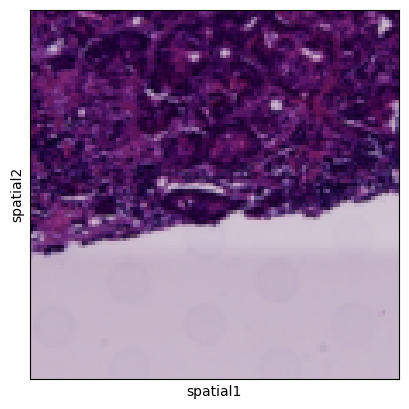

In [150]:
bbox1 = (12500, 15500, 11000, 14000)
bbox1 = (11000, 17000, 11000, 17000)
bbox1 = (14500, 15500, 15000, 16000)
sc.pl.spatial(adata, crop_coord=bbox1)

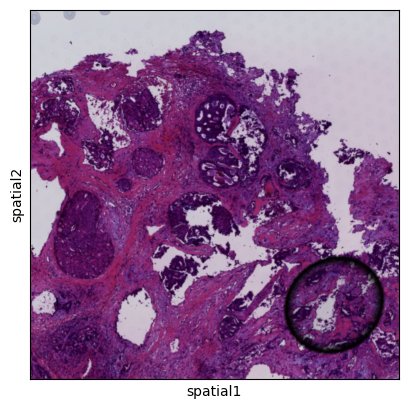

In [162]:
bbox2 = (6000, 12000, 1500, 7500)
sc.pl.spatial(adata, crop_coord=bbox2)

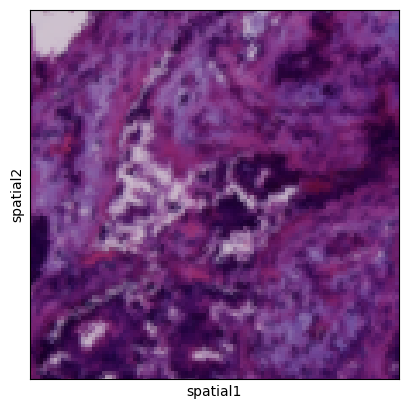

In [169]:
bbox2 = (10000, 11000, 7500, 8500)
sc.pl.spatial(adata, crop_coord=bbox2)

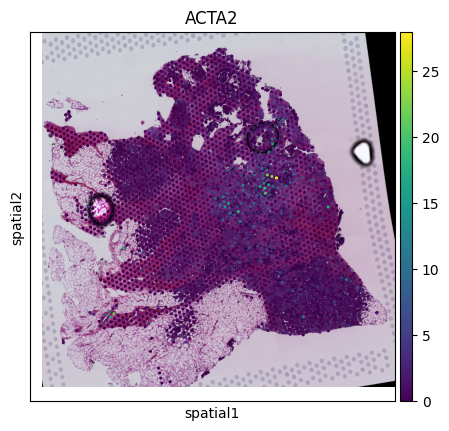

In [166]:
sc.pl.spatial(adata, color='ACTA2')

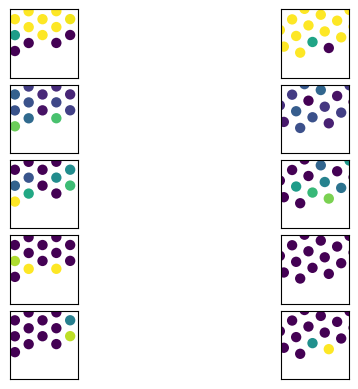

In [160]:
colors = [
    'RCTD_Tumor',
    'RCTD_Fibroblast',
    'RCTD_Macrophage',
    'RCTD_B',
    'RCTD_T',
]
fig, axs = plt.subplots(ncols=len(sid_to_adata), nrows=len(colors))
for c, (sid, adata) in enumerate(sid_to_adata.items()):
    for r, color in enumerate(colors):
        ax = axs[r, c]
        sc.pl.spatial(
            adata, color=color, crop_coord=bbox1, frameon=True, legend_loc=None, colorbar_loc=None,
            ax=ax, title='', show=False, alpha_img=0., size=1., vmax=.5)
        ax.set_ylabel('')
        ax.set_xlabel('')
plt.subplots_adjust(hspace=.1)
        

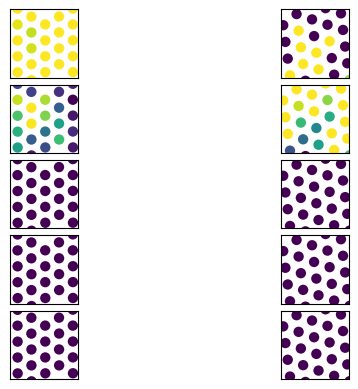

In [170]:
colors = [
    'RCTD_Tumor',
    'RCTD_Fibroblast',
    'RCTD_Macrophage',
    'RCTD_B',
    'RCTD_T',
]
fig, axs = plt.subplots(ncols=len(sid_to_adata), nrows=len(colors))
for c, (sid, adata) in enumerate(sid_to_adata.items()):
    for r, color in enumerate(colors):
        ax = axs[r, c]
        sc.pl.spatial(
            adata, color=color, crop_coord=bbox2, frameon=True, legend_loc=None, colorbar_loc=None,
            ax=ax, title='', show=False, alpha_img=0., size=1., vmax=.5)
        ax.set_ylabel('')
        ax.set_xlabel('')
plt.subplots_adjust(hspace=.1)
        

In [58]:
# only relavent for dinglab data since our channel names are all over the place
# will remove for official example
official_to_options = {
    'Pan-Cytokeratin': ['Pan-Cytokeratin', 'Pan-CK', 'Pan-CK (D)', 'PanCK (D)'],
    'E-cadherin': ['E-cadherin'],
    'CD45': ['CD45 (D)', 'CD45', 'CD45-(D)'],
    'CD45RO': ['CD45RO'],
    'CD45RA': ['CD45RA'],
    'CD8': ['CD8', 'CD8a'],
    'DAPI': ['DAPI'],
    'CD4': ['CD4', 'CD4 (D)'],
    'CD3e': ['CD3e', 'CD3'],
    'Vimentin': ['Vimentin-(D)', 'Vimentin', 'Vimentin (D)'],
    'SMA': ['SMA-(D)', 'SMA', 'SMA (D)', 'a-SMA (D)'],
    'CD31': ['CD31', 'CD31-(D)', 'CD31 (D)'],
    'CD20': ['CD20-(D)', 'CD20', 'CD20 (D)', 'CD20-Akoya'],
    'CD68': ['CD68', 'CD68 (D)', 'CD68-(D)'],
    'CD163': ['CD163'],
    'FOXP3': ['FoxP3', 'FOXP3', 'Foxp3'],
    'cKit': ['cKIT (D)', 'cKit (D)', 'cKit', 'cKIT', 'cKIT-(D)'],
    'MGP': ['MGP', 'MGP (D)', 'MGP-(D)'],
    'CD36': ['CD36-(D)', 'CD36'],
    'PR': ['PR', 'PR-(D)', 'PR (D)'],
    'ER': ['ER', 'ER-(D)', 'ER (D)'],
    'P21': ['P21', 'P21-(D)', 'P21-(D)', 'P21 (D)'],
    'P16': ['P16-(D)'],
    'CK5': ['Keratin 5', 'KRT5'],
    'TFF1': ['TFF1', 'TFF1-(D)', 'TFF1 (D)'],
    'beta-integrin': ['beta-integrin', 'beta3-integrin'],
    'CK14': ['CK14', 'Keratin 14', 'CK14 (D)'],
    'CK17': ['CK17', 'CK17 (D)', 'CK17-(D)', 'Keratin 17'],
    'CK19': ['CK19', 'CK19 (D)', 'CK19-(D)'],
    'CD11b': ['CD11b', 'CD11b (D)', 'CD11b-(D)'],
    'GATA3': ['GATA3', 'GATA3-(D)', 'GATA3 (D)'],
    'PLAT/tPA': ['PLAT/tPA', 'PLAT/tPA (D)'],
    'COX6c': ['COX6c (D)'],
    'Her2': ['Her2', 'Her2 (D)'],
    'Bap1': ['Bap1 (D)'],
    'GLUT1': ['Glut1', 'GLUT1', 'GLUT1-(D)', 'GLUT1 (D)'],
    'CD11c': ['CD11c'],
    'HLA-DR': ['HLA-DR'],
    'Ki67': ['Ki67', 'KI67'],
    'Podoplanin': ['Podoplanin', 'PDPN', 'Podoplanin (D)'],
    'CTLA4': ['CTLA4', 'CTLA4 (D)', 'CTLA4-(D)'],
    'SLC39A6': ['SLC39A6'],
    'BCA1': ['BCA1'],
    'BCAL': ['BCAL'],
    'TUBB3': ['TUBB3', 'TUBB3 (D)'],
    'PTPRZ1': ['PTPRZ1', 'PTPRZ1 (D)'],
    'HIF1A': ['HIF1a', 'HIF1a (D)', 'HIF1A'],
    'PAI1': ['PAI1', 'PAI1-(D)'],
    'GFAP': ['GFAP', 'GFAP (D)'],
    'VEGFA': ['VEGFA', 'VEGFA (D)'],
    'IBA1': ['IBA1', 'IBA1 (D)'],
    'OLIG2': ['OLIG2', 'OLIG2 (D)'],
    'FN1': ['FN1', 'FN1 (D)'],
    'a-Amylase': ['a-Amylase'],
    'Hep-Par-1': ['Hep-Par-1 (D)'],
    'Granzyme-B': ['Granzyme B'],
    'TCF-1': ['TCF-1'],
    'CD39': ['CD39'],
    'PD1': ['PD-1'],
    'PDL1': ['PD-L1'],
    'Histone-H3-Pho': ['Histone H3 Pho'],
    'Maspin': ['Maspin'],
    'MMP9': ['MMP9'],
    'CD44': ['CD44'],
    'CD107A': ['CD107a'],
    'FGFR3': ['FGFR3'],
    'CD138': ['CD138'],
    'MLPH': ['MLPH'],
    'P63': ['P63'],
    'GP2': ['GP2'],
    'COX2': ['COX2'],
    'Lyve-1': ['Lyve-1'],
}
channel_mapping = {v:k for k, vs in official_to_options.items() for v in vs}

In [59]:
config

[{'data': [{'dtype': 'he',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s0_visium.h5ad'},
   {'dtype': 'visium',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s0_visium_processed.h5ad'}],
  'id': 's0',
  'position': 0},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s1_multiplex.ome.tiff'}],
  'id': 's1',
  'position': 5},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s2_multiplex.ome.tiff'}],
  'id': 's2',
  'position': 55},
 {'data': [{'dtype': 'he',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s3_visium.h5ad'},
   {'dtype': 'visium',
    'filepath': '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s3_visium_processed.h5ad'}],
  'id': 's3',
  'position': 100},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorr

In [70]:
import mushroom.data.multiplex as multiplex
scale = .1
learner_data = multiplex.get_learner_data(
    config, scale, (256, 256), 32,
    channels=None, channel_mapping=channel_mapping
)

In [63]:
learner_data.channels

['Bap1',
 'CD31',
 'CD45',
 'CD68',
 'CD8',
 'CK14',
 'CK19',
 'COX6c',
 'DAPI',
 'ER',
 'FOXP3',
 'GATA3',
 'GLUT1',
 'HLA-DR',
 'Her2',
 'Ki67',
 'MGP',
 'PLAT/tPA',
 'PR',
 'Pan-Cytokeratin',
 'Podoplanin',
 'SMA',
 'Vimentin',
 'cKit']

In [77]:
import torchvision.transforms.functional as TF
def rescale(x, scale=.1):
    if not isinstance(x, torch.Tensor):
        x = torch.tensor(x)
    x = rearrange(x, 'h w c -> c h w')
    x = TF.resize(x, (int(x.shape[-2] * scale), int(x.shape[-1] * scale)), antialias=True)
    x = rearrange(x.numpy(), 'c h w -> h w c')    
    return x

In [82]:
channel_to_img.keys()

dict_keys(['DAPI', 'Pan-Cytokeratin', 'SMA-(D)', 'CD45 (D)'])

In [78]:
filepath = '/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s1_multiplex.ome.tiff'

In [83]:
multiplex.get_common_channels([filepath])

['Bap1 (D)',
 'CD20-(D)',
 'CD31',
 'CD45 (D)',
 'CD68 (D)',
 'CD8',
 'CK19',
 'COX6c (D)',
 'DAPI',
 'ER',
 'FoxP3',
 'GATA3 (D)',
 'GLUT1-(D)',
 'HLA-DR',
 'Her2 (D)',
 'Keratin 14',
 'Ki67',
 'MGP-(D)',
 'PLAT/tPA (D)',
 'PR-(D)',
 'Pan-Cytokeratin',
 'Podoplanin',
 'SMA-(D)',
 'Vimentin-(D)',
 'cKIT-(D)']

In [108]:
multiplex_cmap = {
    'Pan-Cytokeratin': (1., 0., 0.),
    'CD45 (D)': (0., 1., 0.),
    'SMA-(D)': (1., 1., 1.),
    'CD8': (1., 1., 0.)
}

contrast_mapping = {
    'Pan-Cytokeratin': 90.,
    'CD45 (D)': 95.,
    'SMA-(D)': 90.,
    'CD8': 90.
}

c1, c2, r1, r2 = [x for x in bbox1]
channel_to_img = multiplex.extract_ome_tiff(filepath, channels=list(multiplex_cmap.keys()))
channel_to_img = {channel:img[r1:r2, c1:c2] for channel, img in channel_to_img.items()}
# channel_to_img = {channel:np.squeeze(rescale(np.expand_dims(img, -1), scale=scale))
#      for channel, img in channel_to_img.items()}

pseudo = multiplex.make_pseudo(channel_to_img, cmap=multiplex_cmap, contrast_pct=90., contrast_mapping=contrast_mapping)
pseudo /= pseudo.max()
pseudo.shape

(6000, 6000, 3)

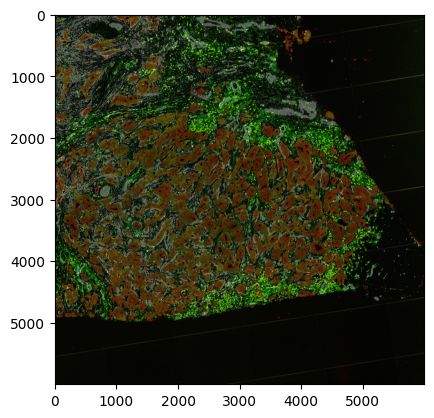

In [109]:
plt.imshow(pseudo)

In [64]:
img = learner_data.section_to_img['s1']

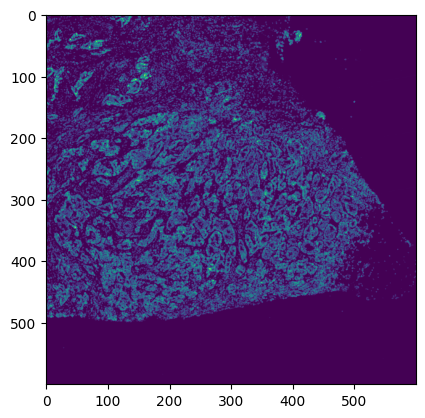

In [72]:
c1, c2, r1, r2 = [int(x * scale) for x in bbox1]
plt.imshow(img[learner_data.channels.index('Pan-Cytokeratin'), r1:r2, c1:c2])

In [71]:
c1, c2, r1, r2 = [int(x * scale) for x in bbox1]

In [17]:
ds = mushroom.learner.train_ds

In [30]:
import cProfile
cProfile.run('ds[0]', sort=2)

         5886 function calls (5883 primitive calls) in 0.156 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.156    0.156 {built-in method builtins.exec}
        1    0.000    0.000    0.156    0.156 <string>:1(<module>)
        1    0.000    0.000    0.156    0.156 visium.py:283(__getitem__)
        1    0.005    0.005    0.155    0.155 visium.py:236(__call__)
        3    0.062    0.021    0.137    0.046 visium.py:59(format_expression)
      170    0.033    0.000    0.033    0.000 visium.py:85(<listcomp>)
      6/3    0.000    0.000    0.015    0.005 _jit_internal.py:474(fn)
        3    0.000    0.000    0.015    0.005 functional.py:879(_return_output)
        3    0.000    0.000    0.015    0.005 functional.py:722(_unique_impl)
        3    0.015    0.005    0.015    0.005 {built-in method unique_dim}
        5    0.012    0.002    0.012    0.002 {built-in method torch.stack}
      170